In [1]:
import numpy as np
from numpy import random as rd
import time
# from solvers_listos import *
from funciones import *
from demandas import *
import seaborn as sns
import json

In [2]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print
# el print es porque se corre allá

{0: 0, 1: 91, 2: 27, 3: 11, 4: 63, 5: 69, 6: 67, 7: 91, 8: 46, 9: 73, 10: 66}


Inicial LS: ['N_0', 'N_2', 'N_0'], costo SO = 6115913.668682318
Final LS: {0: ['N_0', 'N_2', 'N_0'], 1: ['N_0', 'N_8', 'N_4', 'N_5', 'N_6', 'N_0'], 2: ['N_0', 'N_2', 'N_1', 'N_7', 'N_8', 'N_0'], 3: ['N_0', 'N_1', 'N_9', 'N_10', 'N_3', 'N_6', 'N_5', 'N_0'], 4: ['N_0', 'N_1', 'N_2', 'N_0']}, costo SO = 6115913.668682318
Tiempo: 0 | Ruta: ['N_0', 'N_2', 'N_0'] | costo_SO: 159.66304740858226 | costo_r: 234.54637068179076


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_0'], costo SO = 256782.25362288277
Final LS: {0: ['N_0', 'N_1', 'N_4', 'N_9', 'N_10', 'N_7', 'N_0'], 1: ['N_0', 'N_5', 'N_1', 'N_5', 'N_2', 'N_0'], 2: ['N_0', 'N_8', 'N_4', 'N_10', 'N_4', 'N_5', 'N_9', 'N_1', 'N_7', 'N_6', 'N_0'], 3: ['N_0', 'N_2', 'N_0'], 4: ['N_0', 'N_10', 'N_9', 'N_10', 'N_4', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_7', 'N_0']}, costo SO = 256782.25362288277
Tiempo: 1 | Ruta: ['N_0', 'N_1', 'N_4', 'N_9'

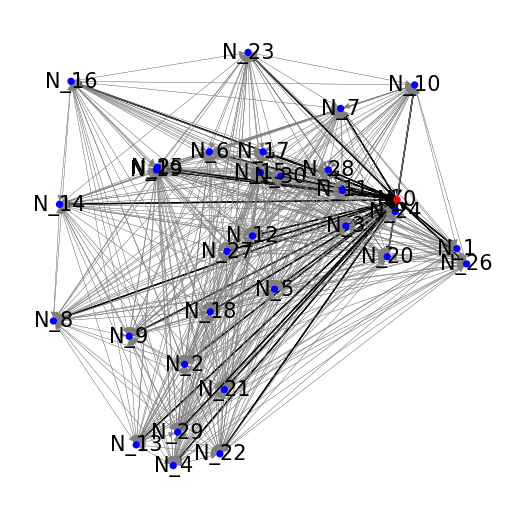

In [3]:
# np.random.seed(0)
horizonte = 60
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'n30full.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'o', T=360, d=30, ruido=0)

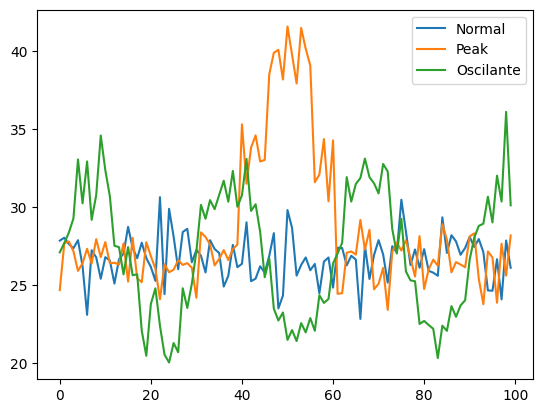

In [4]:
demanda_n = simular_demanda_previa(G, dist="n", T=100, ruido=0)
demanda_c = simular_demanda_previa(G, dist="c", T=100, ruido=0)
demanda_o = simular_demanda_previa(G, dist="o", T=100, ruido=0, d=30)

plt.plot(list(demanda_n['N_1']), label='Normal')
plt.plot(list(demanda_c['N_1']), label='Peak')
plt.plot(list(demanda_o['N_1']), label='Oscilante')
plt.legend()

In [7]:
#rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                          tipo_demanda = 'o', T = 100, d=30)

Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_26', 'N_20', 'N_3', 'N_11', 'N_28', 'N_7', 'N_23', 'N_16', 'N_25', 'N_17', 'N_15', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_0'] | costo_SO: 368.0475250830235 | costo_r: 2024.1656200379316
Tiempo: 3 | Ruta: ['N_0', 'N_1', 'N_10', 'N_30', 'N_5', 'N_22', 'N_2', 'N_18', 'N_27', 'N_12', 'N_6', 'N_19', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1716.707458433794
Tiempo: 4 | Ruta: ['N_0', 'N_24', 'N_26', 'N_20', 'N_3', 'N_11', 'N_28', 'N_7', 'N_23', 'N_16', 'N_25', 'N_17', 'N_15', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_0'

In [8]:
#rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 15, cap = 871)
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico=historia, T = 100, F = 7, cap = 871,
                                                                              tipo_demanda = 'o', d=30)



Inicial LS: [], costo SO = 0.0
Final LS: {0: [], 1: [], 2: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_26', 'N_25', 'N_19', 'N_28', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_6', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 3: [], 4: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], 5: ['N_0', 'N_0'], 6: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 13155129.454890115
Final LS: {0: [], 1: ['N_0', 'N_24', 'N_20', '

In [9]:
insatisf_R = []
insatisf_P = []
print(len(costos_R[0]))
for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


100


100

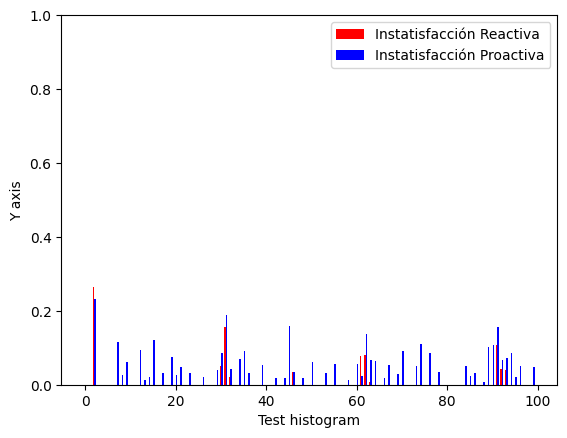

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#The data

#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'r', label = 'Instatisfacción Reactiva', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'b', label = 'Instatisfacción Proactiva', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

(0.0, 2000.0)

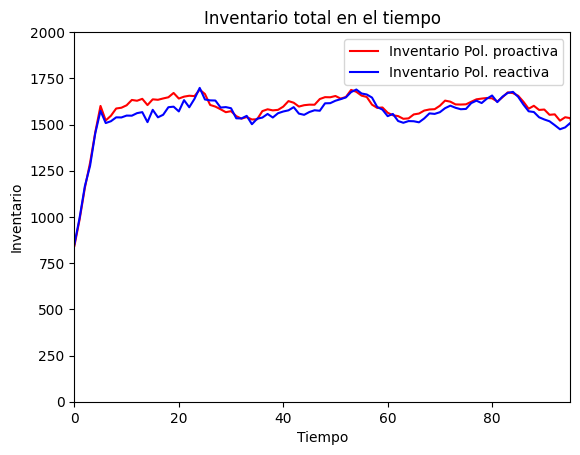

In [11]:
plt.plot(smooth(inventarios_R, 10), color = 'red', label = 'Inventario Reactiva')
plt.plot(smooth(inventarios_P, 10), color = 'blue', label = 'Inventario Proactiva')

plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0000,2000)

In [12]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

(0.0, 2000.0)

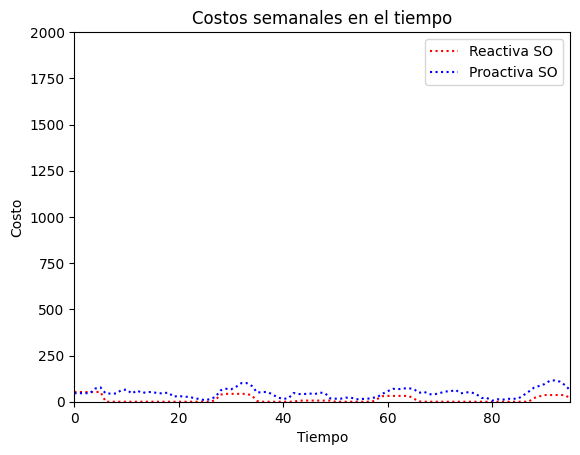

In [13]:
plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

(0.0, 3000.0)

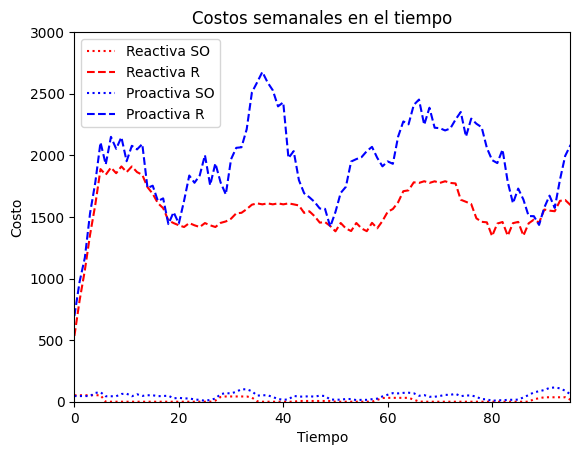

In [15]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,3000)

In [16]:
costo_total_P_inv = [costos_P[0][i]*3 + costos_P[1][i] + inventarios_P[i]*2 for i in range(len(costos_P[0]))]
costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

(0.0, 3500.0)

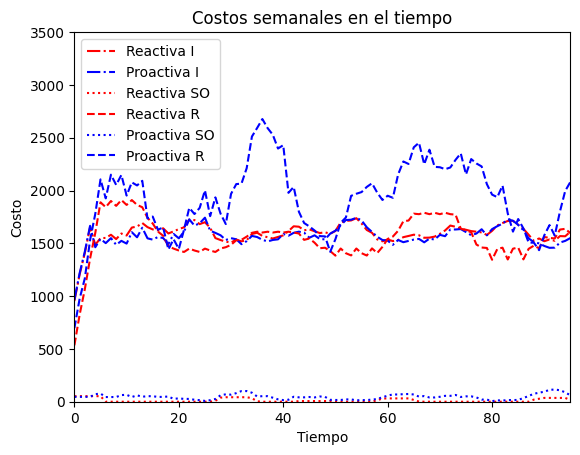

In [18]:
plt.plot(smooth(inventarios_R, 7), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(inventarios_P, 7), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')

plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

# plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
# plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,3500)

(0.0, 95.0)

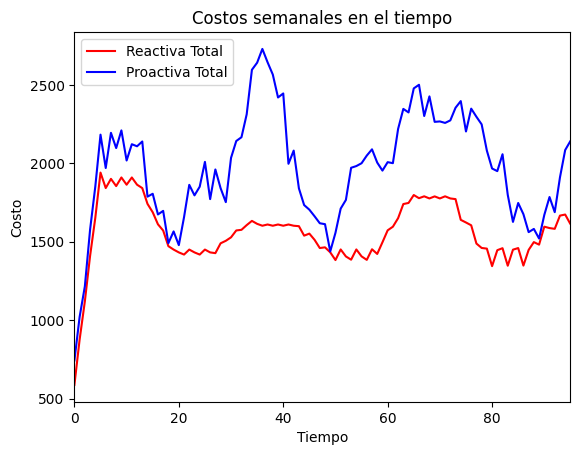

In [20]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

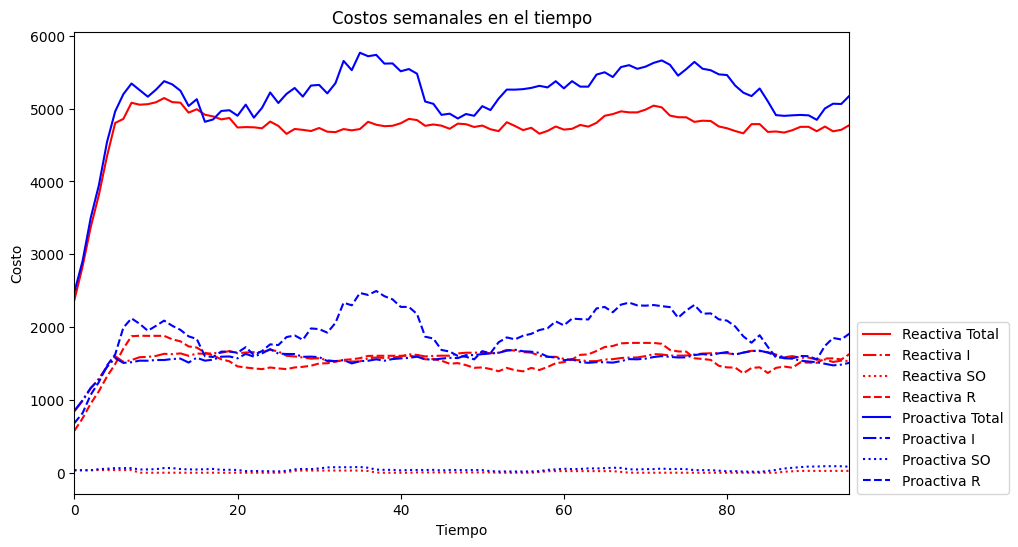

In [19]:

plt.figure(figsize=(10,6))

plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costo_total_P_inv, 10), color = 'blue', label = 'Proactiva Total')
plt.plot(smooth(inventarios_P, 10), linestyle = 'dashdot', color = 'blue', label = 'Proactiva I')
plt.plot(smooth(costos_P[0], 10), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 10), color = 'blue', linestyle = '--', label = 'Proactiva R')


plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
# plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,6000)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
l2 = plt.legend(bbox_to_anchor=(1.01, 0), loc="lower left", borderaxespad=0)
plt.show()

In [ ]:
# plt.plot(smooth(costo_total_R_inv, 10), color = 'red', label = 'Reactiva Total')
# plt.plot(smooth(inventarios_R, 10), linestyle = 'dashdot', color = 'red', label = 'Reactiva I')
# plt.plot(smooth(costos_R[0], 10), color = 'red', linestyle = 'dotted', label = 'Reactiva SO') 
# plt.plot(smooth(costos_R[1], 10), color = 'red', linestyle = '--', label = 'Reactiva R')

costo_rutas_R = np.sum(costos_R[1])/1000000
costo_SO_R = np.sum(costos_R[0])*3/1000000
costo_inv_R = np.sum(inventarios_R)*2/1000000
CR = [costo_rutas_R, costo_SO_R, costo_inv_R]

costo_rutas_P = np.sum(costos_P[1])/1000000
costo_SO_P = np.sum(costos_P[0])*3/1000000
costo_inv_P = np.sum(inventarios_P)*2/1000000
CP = [costo_rutas_P, costo_SO_P, costo_inv_P]
#The data
print(CR, CP)
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(3)]
fig = plt.figure()
ax = fig.add_subplot(111)

# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, CR, width, color = 'r', label = 'Estrategia Reactiva', align='edge')
ax.bar(range(3), CP, width, color = 'b', label = 'Estrategia Proactiva', align='edge')
plt.xticks([0, 1, 2],['Rutas', 'Stockouts', 'Inventario'])
plt.xlabel('Categoría')
plt.ylabel('Costos (MM\$)')
plt.legend()
plt.ylim(0,2)
plt.show()

In [ ]:
# costo_total_R_inv = [costos_R[0][i]*3 + costos_R[1][i] + inventarios_R[i]*2 for i in range(len(costos_R[0]))]

labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_P[0])*3, np.sum(costos_P[1]), np.sum(inventarios_P)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('Set3')
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Proactiva')
plt.show()

In [ ]:
CR_R = []
for cr in costos_R[1]:
    if cr == np.inf:
        CR_R.append(0)
    else:
        CR_R.append(cr)

In [ ]:
labels = 'Stockouts', 'Rutas', 'Inventarios'
sizes = [np.sum(costos_R[0])*3, np.sum(CR_R), np.sum(inventarios_R)*2]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors=sns.color_palette('hls')[3:]
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Costos totales Política Reactiva')
plt.show()

In [ ]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [ ]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [ ]:
#df_nodos_corr.corr()

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}_osc.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'o', T=1000, d=30)
        #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                           tipo_demanda = 'o', T = 360, d=30)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')

In [ ]:
n_s = [10]#,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

In [ ]:


# generamos un dataframe para luego plotear
perdidas_P_1 = np.array(perdidas_P['n20estandar'])
dias = np.arange(1,366)
perdidas_R_1 = np.array(perdidas_R['n20estandar'])
# ahora graficamos
plt.figure(figsize=(15,5))
plt.plot(dias, perdidas_P_1, label = 'Politica P')

plt.plot(dias, perdidas_R_1, label = 'Politica R')

plt.legend()

plt.show()


## Simulación Completa

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_9', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 962.6457314421029
Tiempo: 2 | Ruta: ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_5', 'N_0'] | costo_SO: 80.15729303100707 | costo_r: 1255.8203857790752
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1128.5821279779746
Tiempo: 4 | Ruta: ['N_0', 'N_5', 'N_1', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 921.8746422790589
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1315.1686430750585
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_6', 'N_5', 'N_0'] | costo_SO: 11.252356104615604 | costo_r: 1096.157221103769
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 

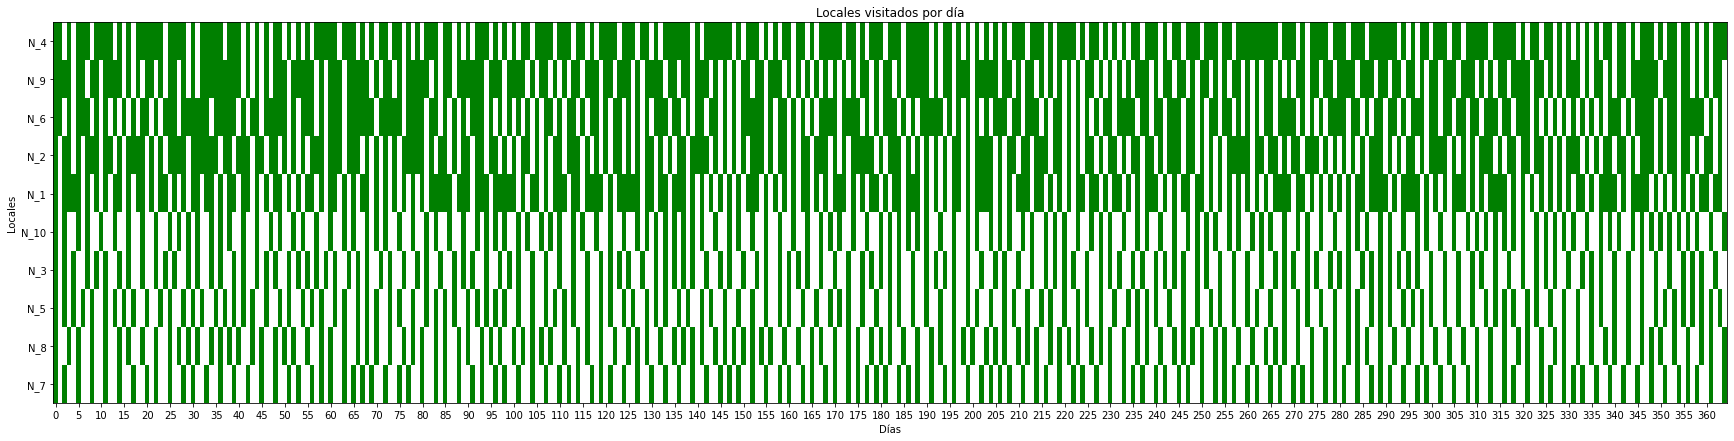

Listo n10empty.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_9', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.2841539958777
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1309.2635952925966
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1040.6603129940581
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1237.7140868651495
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1228.1515096088024
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | co

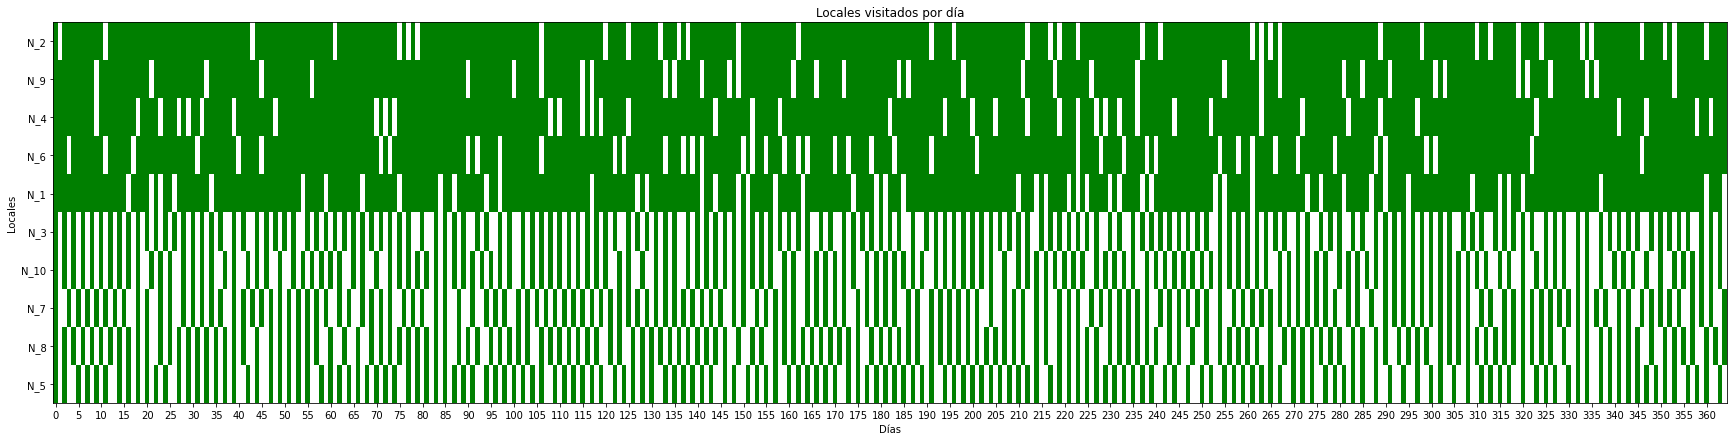

Listo n10empty.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1402.2576333062188
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 100.6503513635099 | costo_r: 365.1410686296462
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 10.542569664853577 | costo_r: 1386.7181515025054
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1017.1854637372273
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1386.7181515025054
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1017.1854637372273
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5',

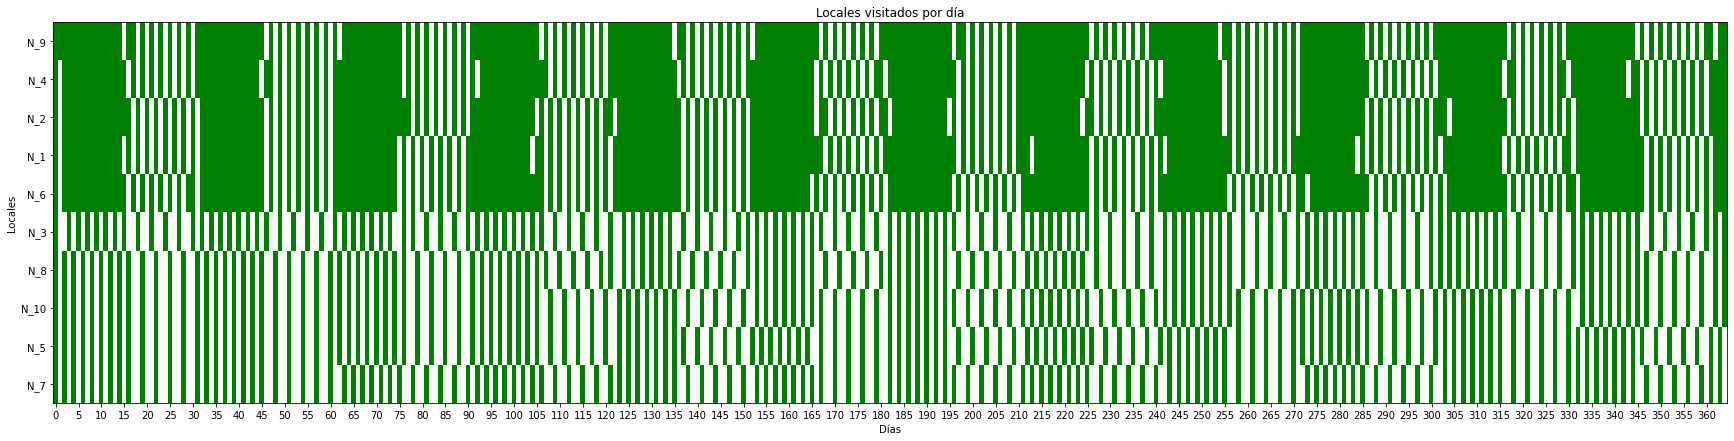

Listo n10empty.xlsx con demanda o
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


Tiempo: 0 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 176.9488511277076 | costo_r: 365.1410686296462
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0'] | costo_SO: 135.64926384307995 | costo_r: 1104.4432963666645
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1230.2772589240305
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1047.5690981506457
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1228.1515096088024
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_1', 'N_3', 'N_8', 'N_0'] | costo_SO: 146.11645691684217 | costo_r: 1071.619458462193
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 959.2933657514568
Tiempo: 7 | Ruta: ['N_0', 'N_9', 

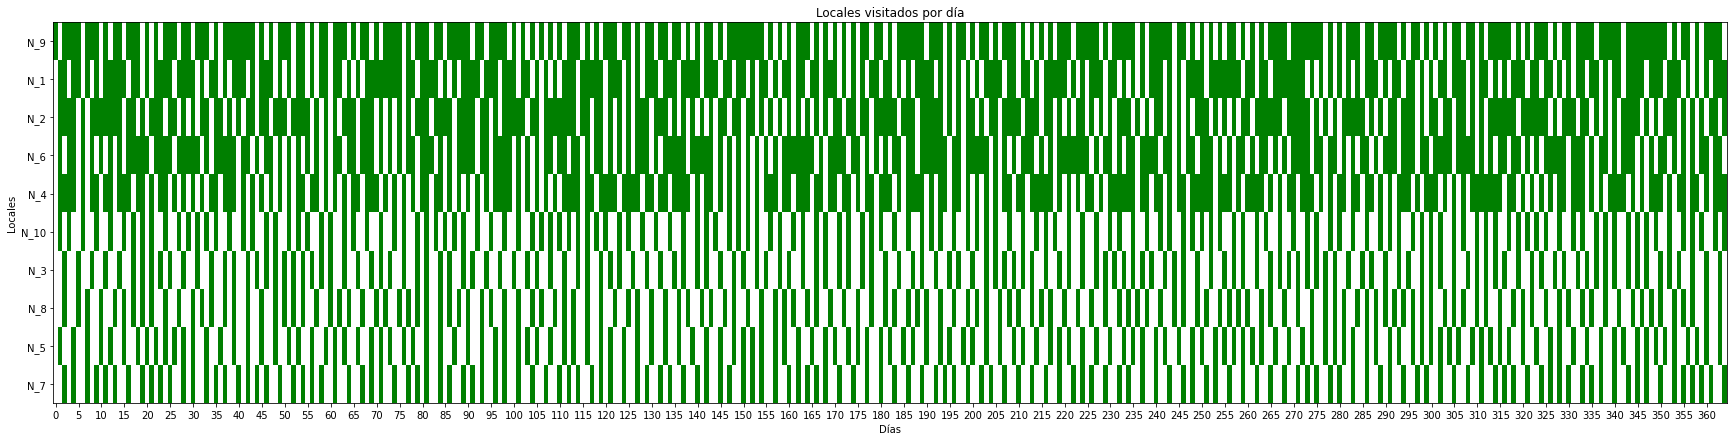

Listo n10estandar.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


Tiempo: 0 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_7', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1315.6283002944047
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1128.5821279779746
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_3', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1212.7970606151503
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_9', 'N_1', 'N_7', 'N_6', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 1239.2452579667488
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_3', 'N_1', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1134.727222042784
Tiempo: 6 | Ruta: ['N_0', 'N_9', 'N_2', 'N_6', 'N_8', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1218.4578373717827
Tiempo: 7 | Ruta

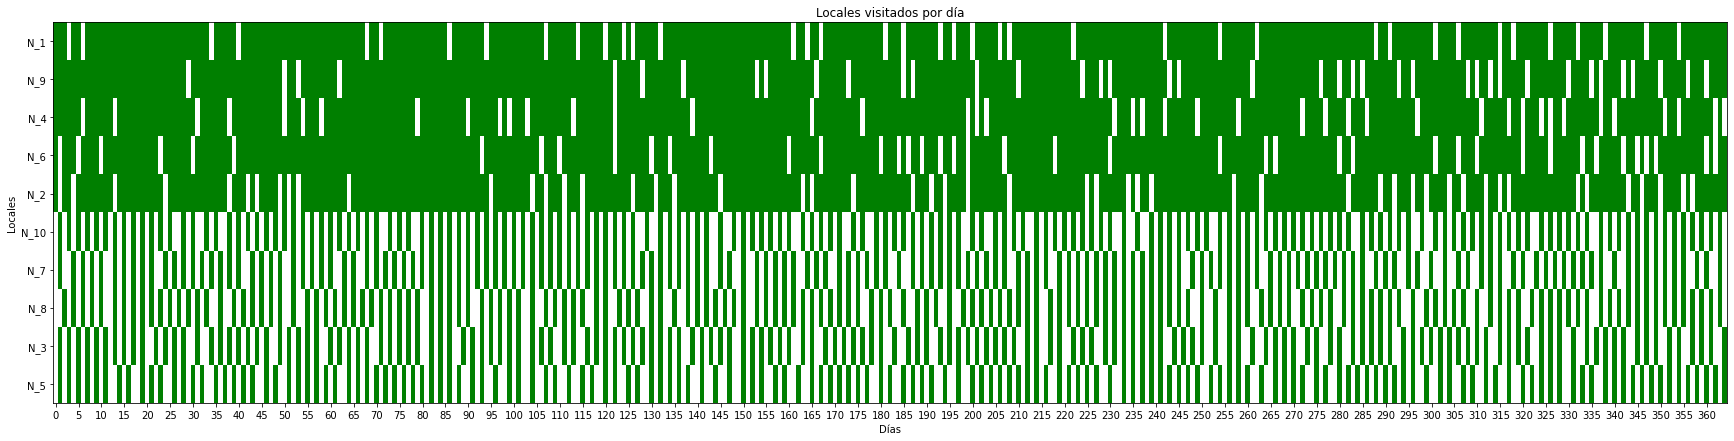

Listo n10estandar.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 146.75773970977244 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1309.2635952925966
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1094.6400199471364
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 78.53275658939496 | costo_r: 1233.6865781655288
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 1170.217037074204
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1233.6865781655288
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'] | costo_SO: 0 

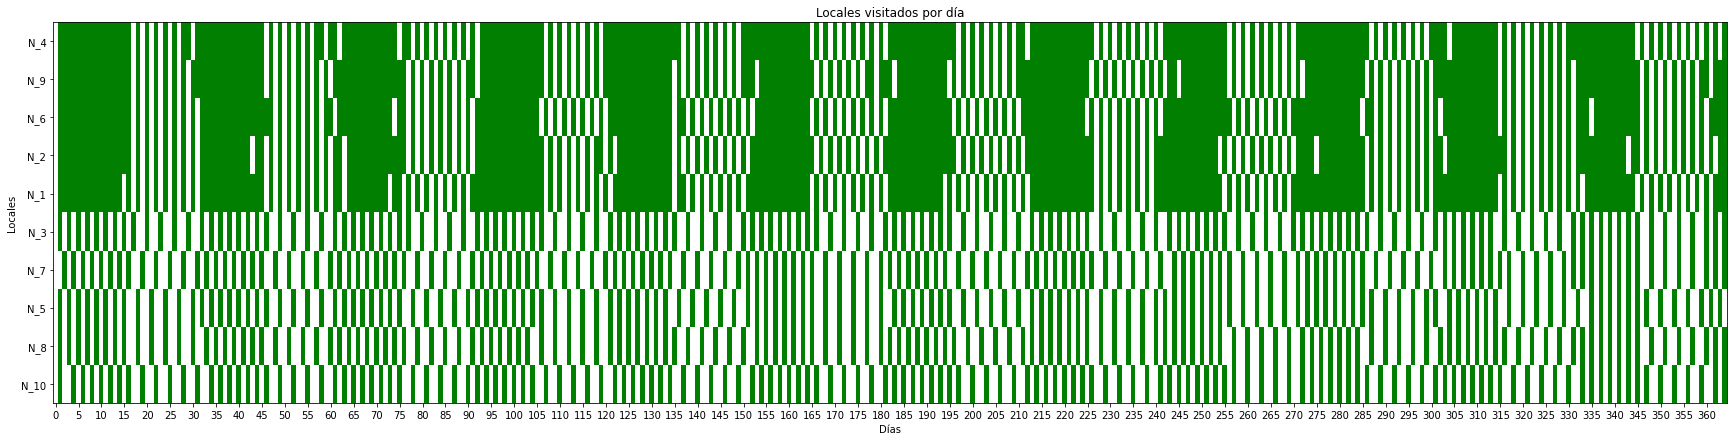

Listo n10estandar.xlsx con demanda o
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_2', 'N_0'] | costo_SO: 0 | costo_r: 501.8753853982822
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 909.8623108943261
Tiempo: 5 | Ruta: ['N_0', 'N_10', 'N_8', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1056.0925592506203
Tiempo: 6 | Ruta: ['N_0', 'N_9', 'N_3', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 966.7835006045457
Tiempo: 7 | Ruta: ['N_0', 'N_2', 'N_6', 'N_0'] | costo_SO: 32.43121608422754 | costo_r: 849.0415676483274
Tiempo: 8 | Ruta: ['N_0', 'N_4', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 668.4466684182628
Tiempo: 9 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_

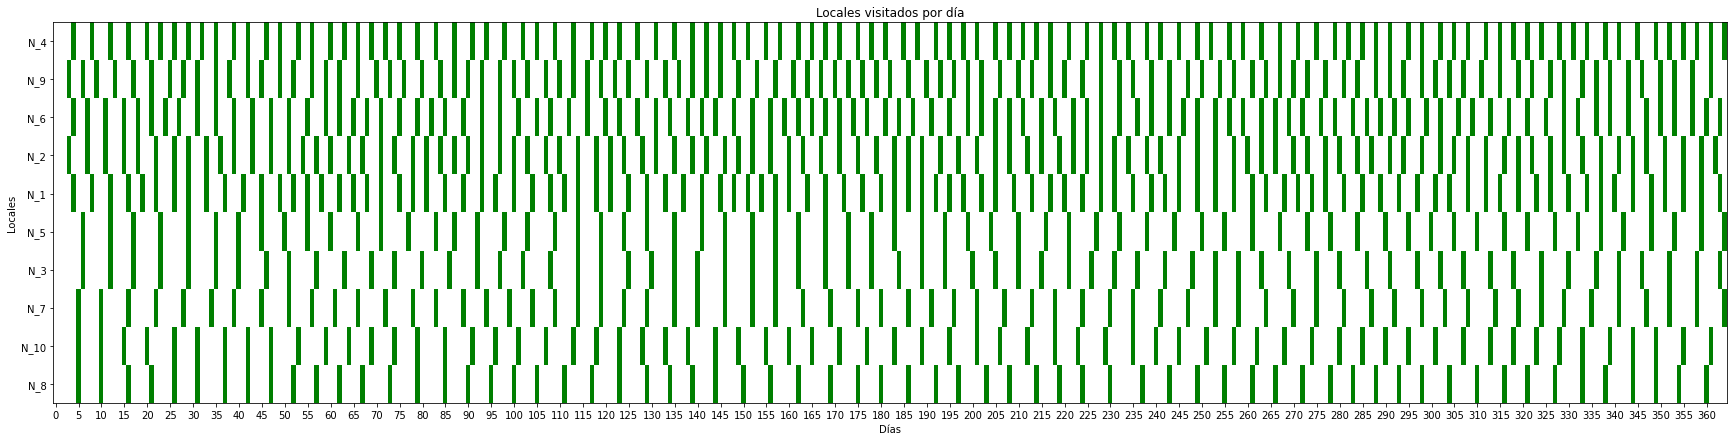

Listo n10full.xlsx con demanda n
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 872.477862101553
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 701.0796598701113
Tiempo: 5 | Ruta: ['N_0', 'N_5', 'N_8', 'N_7', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 1151.0742948040097
Tiempo: 6 | Ruta: ['N_0', 'N_9', 'N_10', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 951.8789600966211
Tiempo: 7 | Ruta: ['N_0', 'N_4', 'N_2', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 701.0796598701113
Tiempo: 8 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 9 | Ruta: ['N_0', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 751.3880488802041
Tiempo: 10 | R

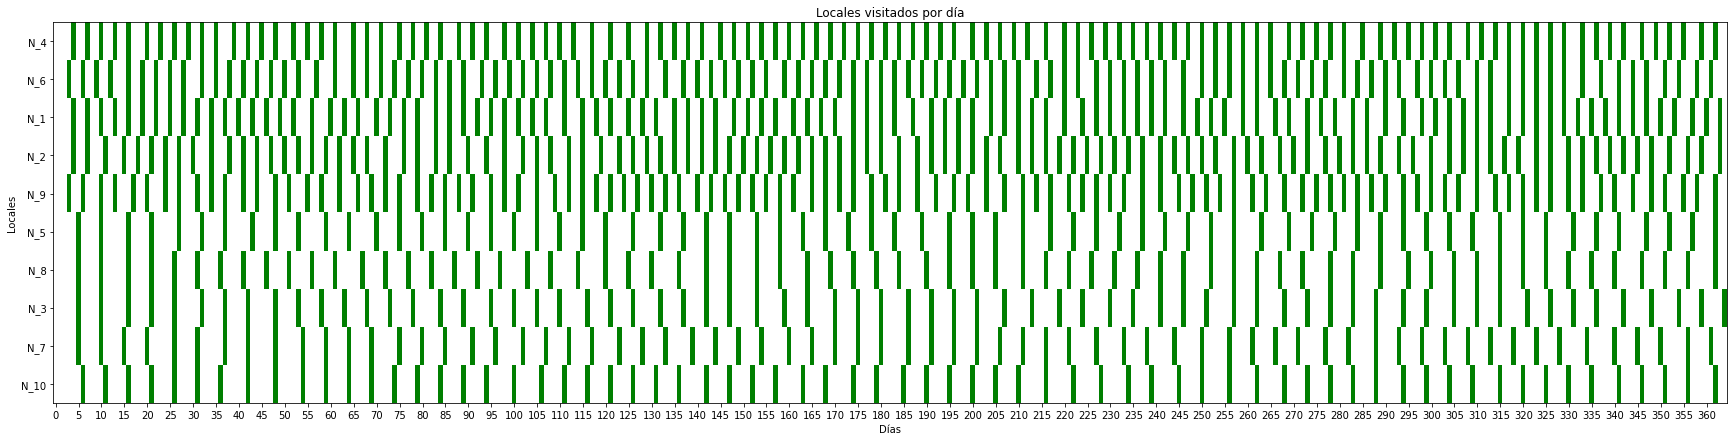

Listo n10full.xlsx con demanda c
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
No hay locales que visitar
Tiempo: 4 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 5 | Ruta: ['N_0', 'N_10', 'N_5', 'N_8', 'N_7', 'N_3', 'N_0'] | costo_SO: 0 | costo_r: 1200.5007576237413
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 983.6305219771198
Tiempo: 7 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 8 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 9 | Ruta: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'] | costo_SO: 48.12275389919449 | costo_r: 983.630521977119

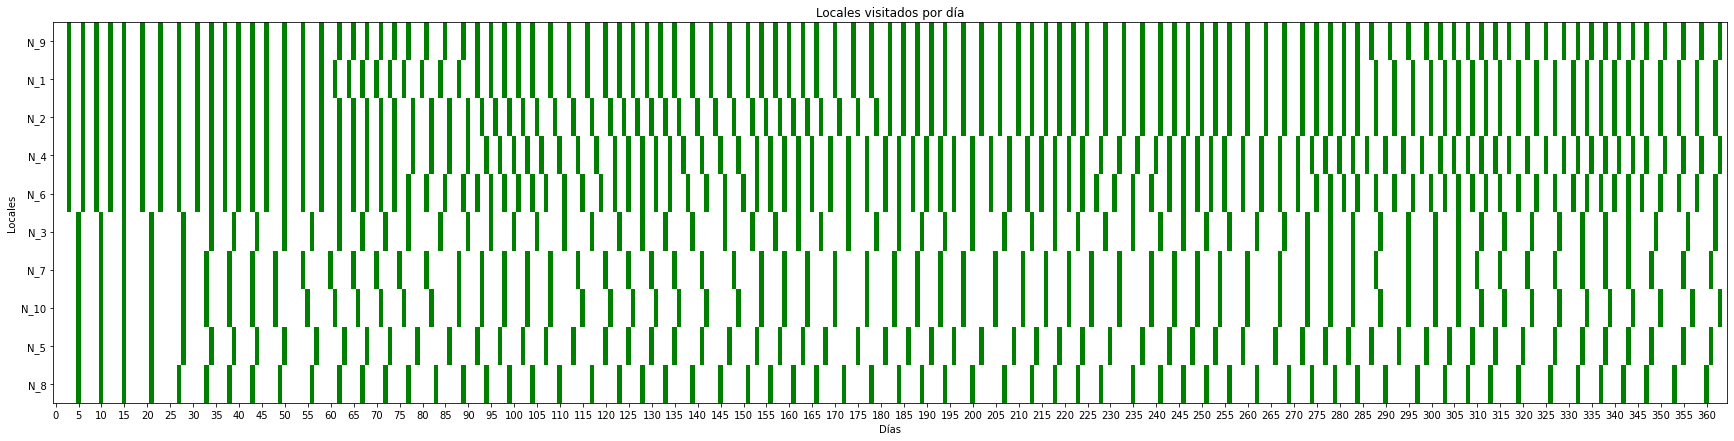

Listo n10full.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_15', 'N_10', 'N_6', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_9', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2164.794998138816
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_8', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 823.6898631556985
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_12', 'N_16', 'N_18', 'N_17', 'N_1', 'N_8', 'N_20', 'N_5', 'N_11', 'N_9', 'N_10', 'N_15', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1805.2068649432915
Tiempo: 3 | Ruta: ['N_0', 'N_3', 'N_16', 'N_19', 'N_18', 'N_2', 'N_13', 'N_4', 'N_11', 'N_9', 'N_10', 'N_7', 'N_0'] | costo_SO: 82.10139150712526 | costo_r: 1515.2102544319316
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_5', 'N_

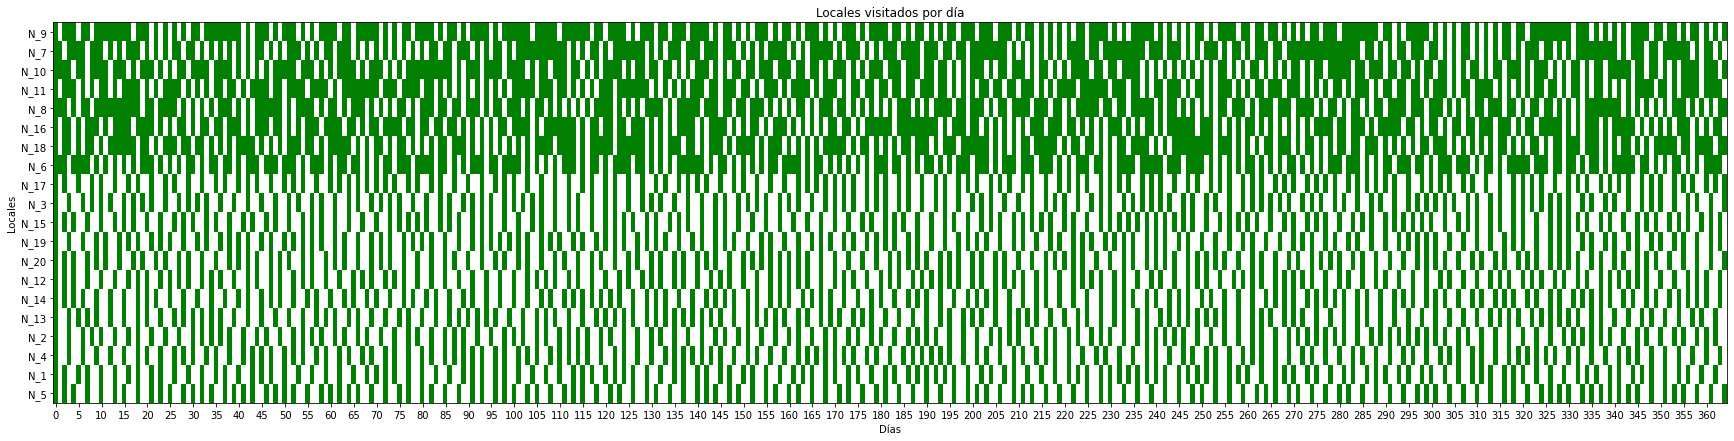

Listo n20empty.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_2', 'N_1', 'N_17', 'N_18', 'N_19', 'N_12', 'N_16', 'N_3', 'N_10', 'N_7', 'N_14', 'N_15', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2230.1409716356375
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 884.3635188381679
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_14', 'N_7', 'N_10', 'N_9', 'N_11', 'N_6', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_4', 'N_0'] | costo_SO: 0 | costo_r: 1817.0293080130164
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_10', 'N_15', 'N_7', 'N_12', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1726.9861147606423
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_14', 'N_7', 'N

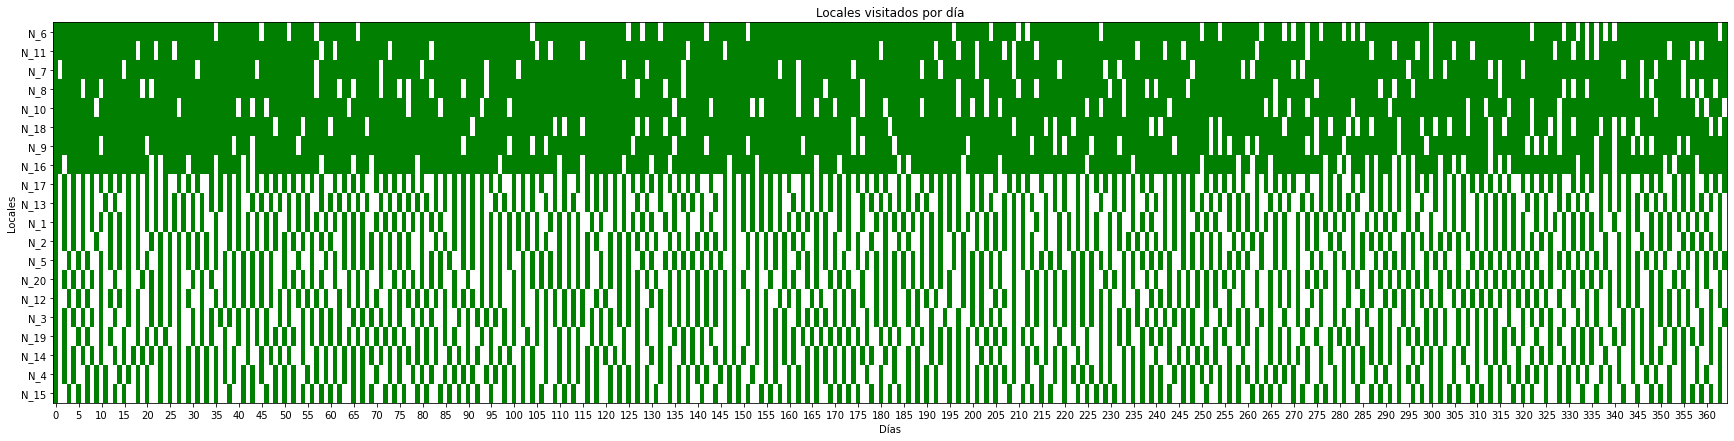

Listo n20empty.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_15', 'N_10', 'N_9', 'N_11', 'N_6', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2142.132829168423
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_10', 'N_0'] | costo_SO: 22.13803518566307 | costo_r: 810.332398382041
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_6', 'N_9', 'N_5', 'N_0'] | costo_SO: 217.2568423433283 | costo_r: 1957.2787517136073
Tiempo: 3 | Ruta: ['N_0', 'N_7', 'N_15', 'N_10', 'N_4', 'N_11', 'N_9', 'N_6', 'N_16', 'N_18', 'N_0'] | costo_SO: 11.662920761805939 | costo_r: 1388.7103660491211
Tiempo: 4 | Ruta:

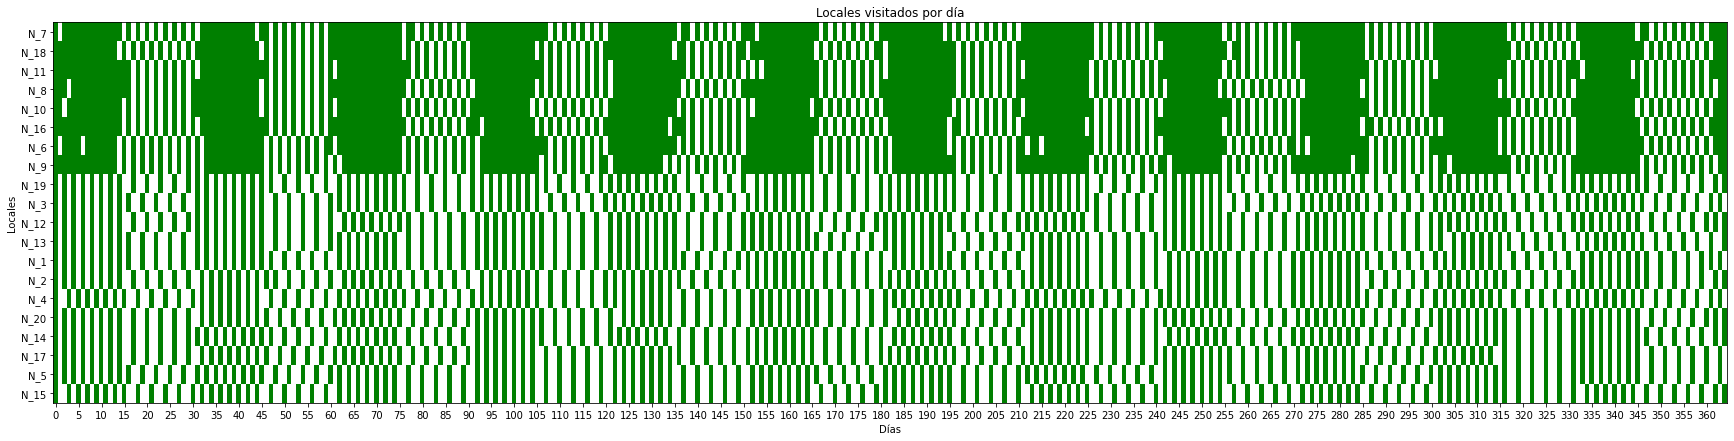

Listo n20empty.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


Tiempo: 0 | Ruta: ['N_0', 'N_11', 'N_0'] | costo_SO: 132.90829505341986 | costo_r: 218.8880992653552
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_12', 'N_16', 'N_18', 'N_2', 'N_13', 'N_5', 'N_4', 'N_8', 'N_6', 'N_9', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 17.09674321433929 | costo_r: 1790.0818600927596
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_19', 'N_17', 'N_1', 'N_20', 'N_11', 'N_9', 'N_10', 'N_15', 'N_0'] | costo_SO: 0 | costo_r: 1313.7120714082146
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_9', 'N_4', 'N_8', 'N_2', 'N_18', 'N_16', 'N_7', 'N_0'] | costo_SO: 231.5617467768888 | costo_r: 1414.5363259659937
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_13', 'N_20', 'N_8', 'N_11', 'N_10', 'N_14', 'N_15', 'N_5', '

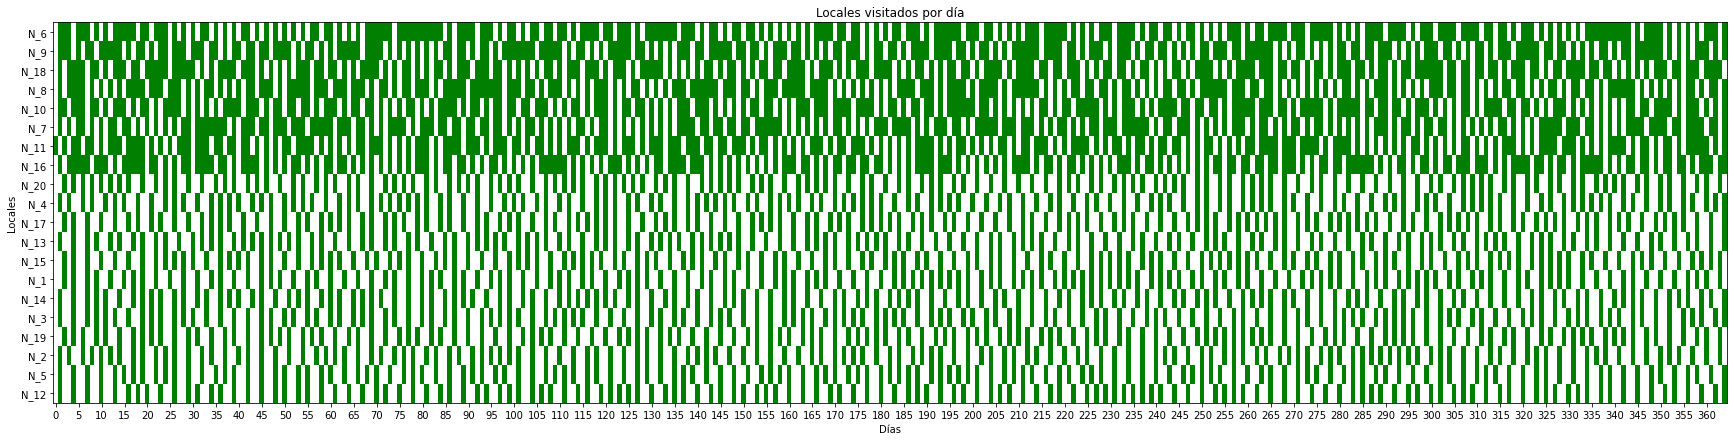

Listo n20estandar.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


Tiempo: 0 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1085.504912980615
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_10', 'N_15', 'N_14', 'N_7', 'N_3', 'N_12', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_4', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2139.671388886386
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1021.2885187903056
Tiempo: 3 | Ruta: ['N_0', 'N_3', 'N_7', 'N_14', 'N_15', 'N_10', 'N_9', 'N_11', 'N_6', 'N_16', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_8', 'N_20', 'N_13', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 2076.863368670499
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_11

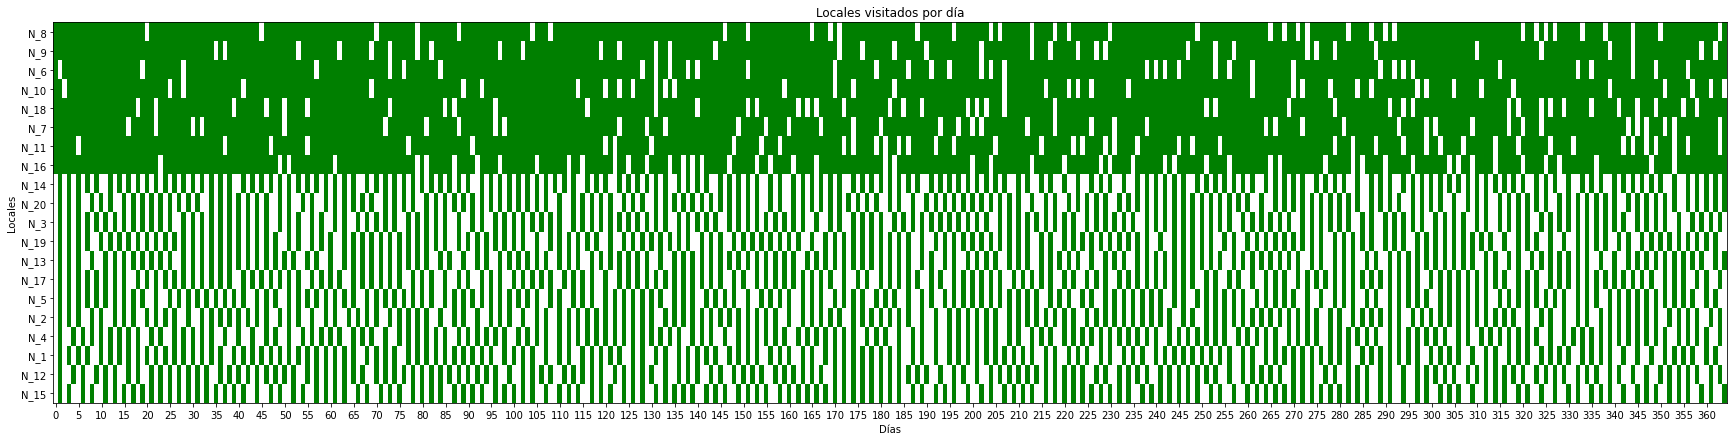

Listo n20estandar.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 480.4531225919955 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_10', 'N_15', 'N_7', 'N_19', 'N_16', 'N_18', 'N_17', 'N_1', 'N_13', 'N_20', 'N_8', 'N_11', 'N_6', 'N_9', 'N_5', 'N_0'] | costo_SO: 219.91485249169693 | costo_r: 2059.3027386659014
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_10', 'N_14', 'N_12', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_4', 'N_2', 'N_0'] | costo_SO: 24.30669376695527 | costo_r: 1853.9141182283856
Tiempo: 3 | Ruta: ['N_0', 'N_3', 'N_7', 'N_15', 'N_10', 'N_9', 'N_6', 'N_16', 'N_19', 'N_18', 'N_17', 'N_1', 'N_13', 'N_11', 'N_5', 'N_0'] | costo_SO: 31.036824337278603 | costo_r: 1990.3908416047836
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8'

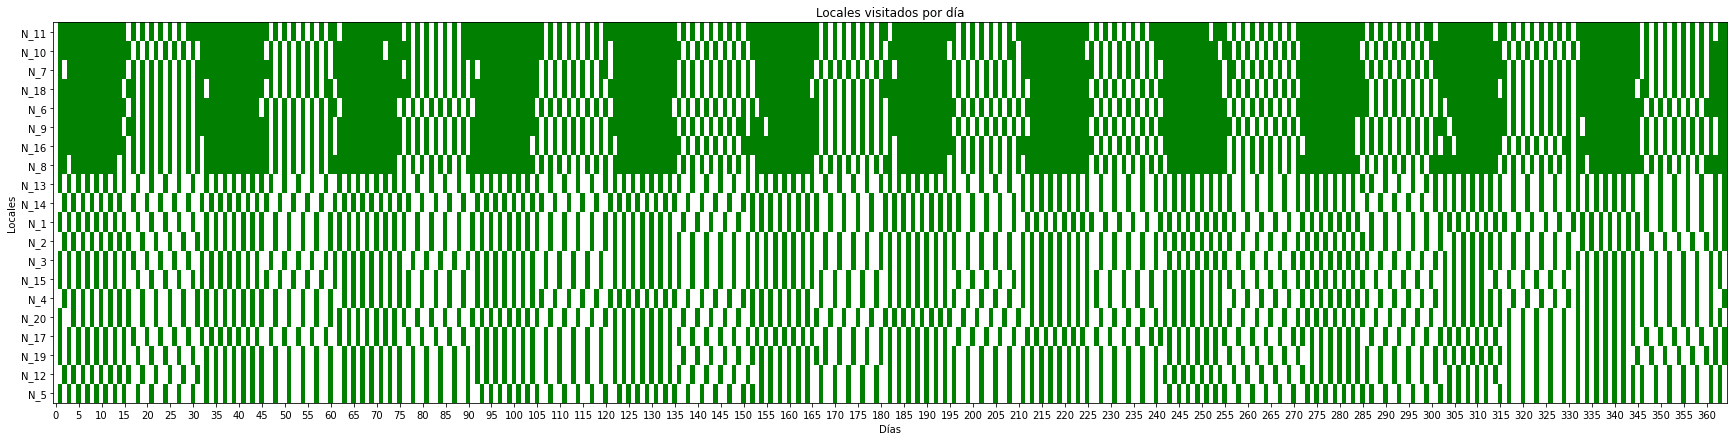

Listo n20estandar.xlsx con demanda o
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_10', 'N_0'] | costo_SO: 23.774051340104727 | costo_r: 386.4382757698083
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_15', 'N_10', 'N_9', 'N_6', 'N_16', 'N_19', 'N_18', 'N_1', 'N_2', 'N_8', 'N_11', 'N_4', 'N_0'] | costo_SO: 83.0915507962652 | costo_r: 1837.493110376533
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_14', 'N_3', 'N_12', 'N_16', 'N_18', 'N_17', 'N_8', 'N_20', 'N_13', 'N_5', 'N_0'] | costo_SO: 191.99942432637363 | costo_r: 1577.6786467160157
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_11', 'N_4', 'N_10', 'N_15', 'N_7', 'N_19', 'N_0'] | costo_SO: 111.34135732500364 | costo_r: 1309.5109635530196
Tiempo: 5 | Ruta: ['N_0', 'N_3'

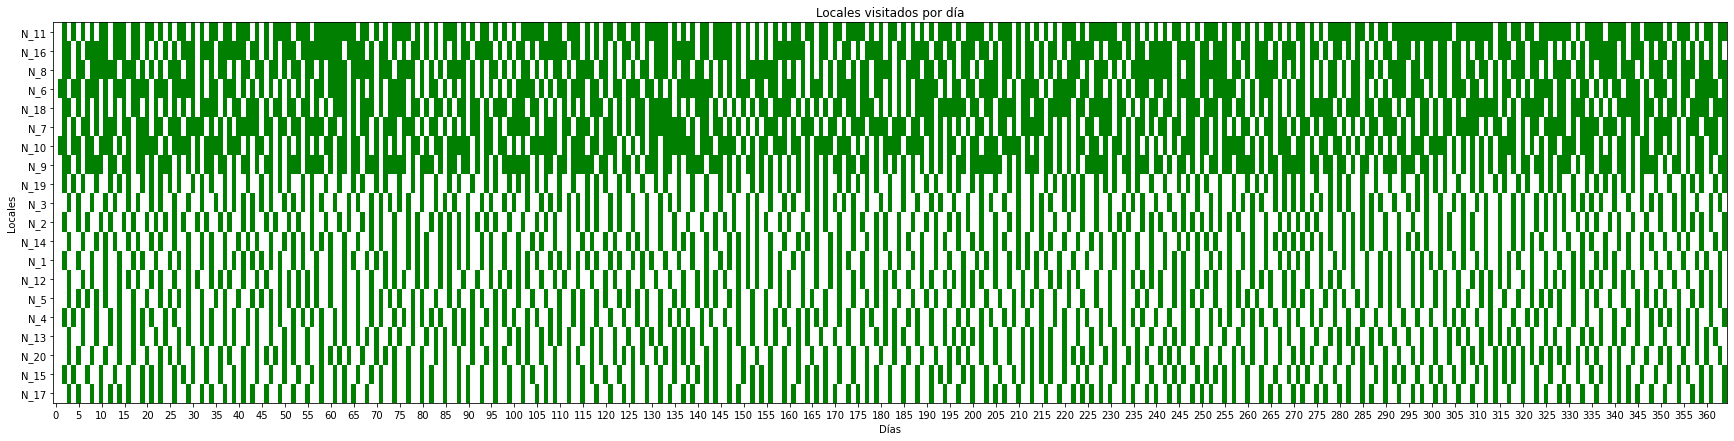

Listo n20full.xlsx con demanda n
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_18', 'N_8', 'N_11', 'N_9', 'N_6', 'N_10', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1085.504912980615
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_17', 'N_16', 'N_19', 'N_18', 'N_1', 'N_2', 'N_20', 'N_5', 'N_4', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 0 | costo_r: 1901.7917691572236
Tiempo: 3 | Ruta: ['N_0', 'N_6', 'N_9', 'N_10', 'N_15', 'N_7', 'N_12', 'N_16', 'N_18', 'N_13', 'N_0'] | costo_SO: 0 | costo_r: 1384.5241126756257
Tiempo: 4 | Ruta: ['N_0', 'N_3', 'N_14', 'N_7', 'N_10', 'N_9', 'N_6', 'N_16', 'N_19', 'N_18', 'N_1', 'N_2', 'N_8', 'N_11', 'N_4', 'N_0'] | costo_SO: 0 | costo_r: 1731.482

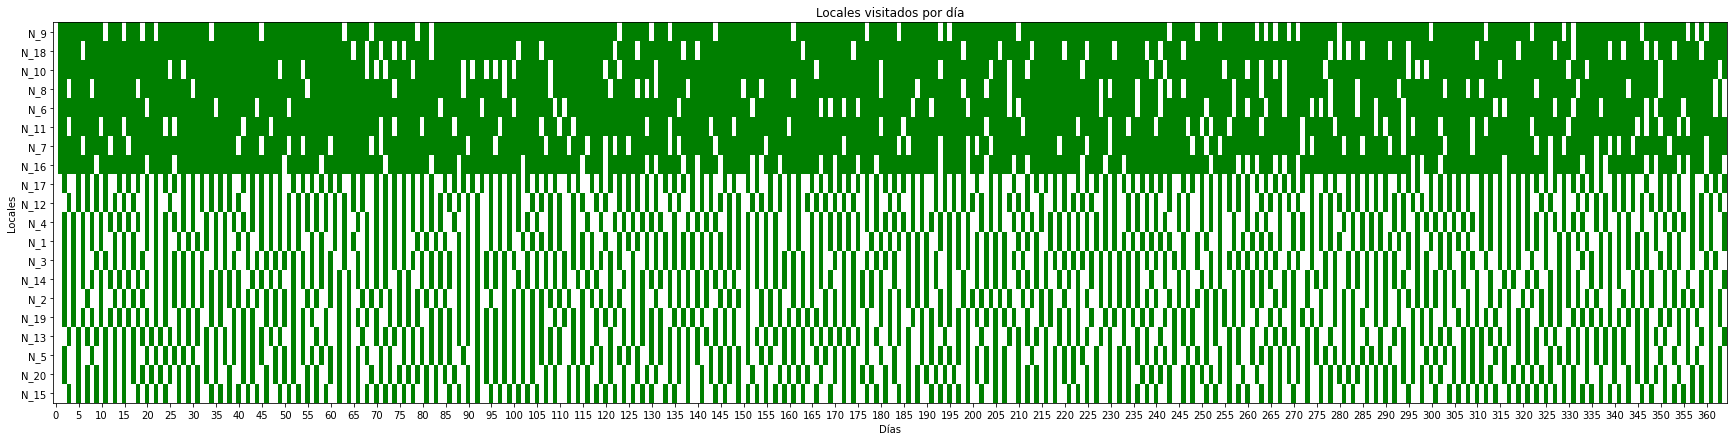

Listo n20full.xlsx con demanda c
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_8', 'N_7', 'N_0'] | costo_SO: 278.7323487798943 | costo_r: 781.735687069994
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_13', 'N_2', 'N_18', 'N_16', 'N_3', 'N_10', 'N_15', 'N_7', 'N_0'] | costo_SO: 199.18927281165298 | costo_r: 1475.333132217463
Tiempo: 3 | Ruta: ['N_0', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_8', 'N_20', 'N_5', 'N_4', 'N_9', 'N_6', 'N_10', 'N_7', 'N_14', 'N_0'] | costo_SO: 107.31050807832814 | costo_r: 1730.5971403346657
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_13', 'N_2', 'N_18', 'N_16', 'N_3', 'N_10', 'N_15', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 1499.0535977603524
T

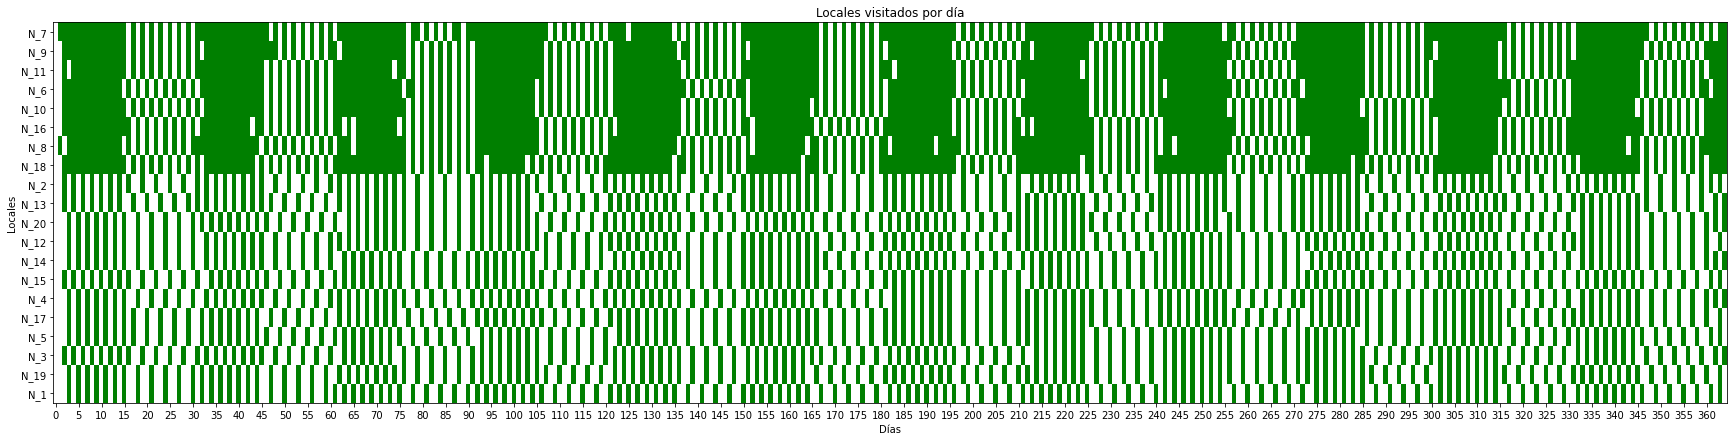

Listo n20full.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_20', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2523.6263658394946
Tiempo: 1 | Ruta: ['N_0', 'N_1', 'N_10', 'N_11', 'N_28', 'N_30', 'N_27', 'N_29', 'N_4', 'N_9', 'N_8', 'N_16', 'N_0'] | costo_SO: 62.3456550776701 | costo_r: 1743.2471083661167
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_20', 'N_11', 'N_28', 'N_7', 'N_17', 'N_15', 'N_27', 'N_5', 'N_22', 'N_2', 'N_9', 'N_14', 'N_16', 'N_19', 'N_25', 'N_23', 'N_0'] | costo_SO: 228.99295746748646 | costo_r: 1748.4879391030026
Tiempo: 3 | Ruta: ['N_0'

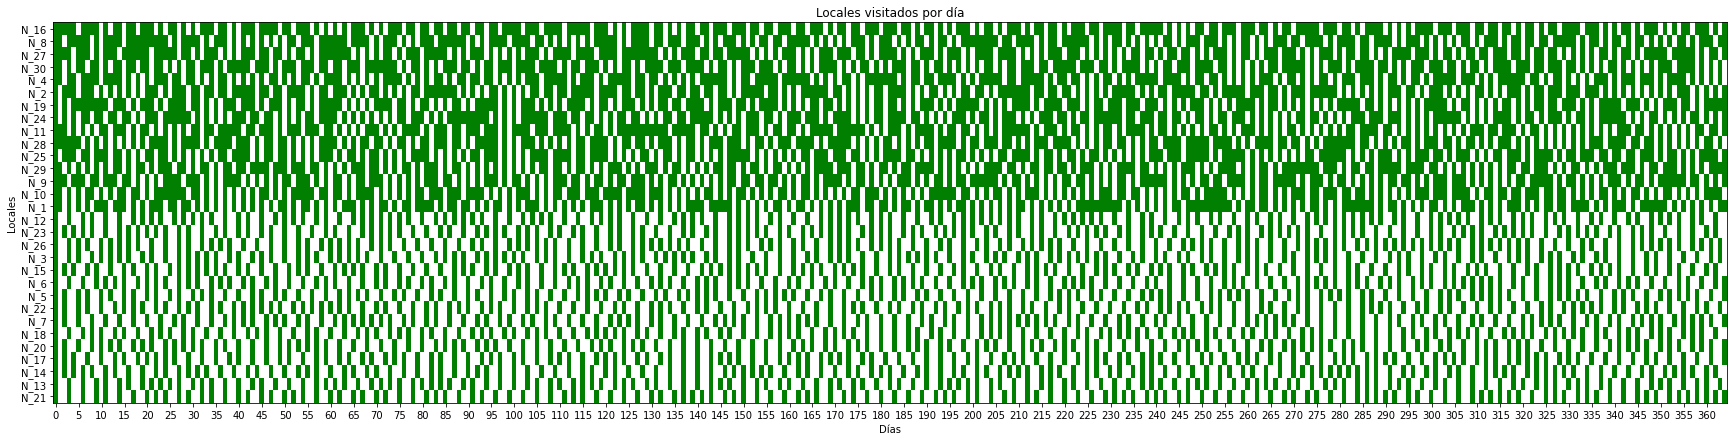

Listo n30empty.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_20', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_19', 'N_25', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2508.2842938187155
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_25', 'N_30', 'N_11', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 1651.3269811754997
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_23', 'N_16', 'N_8', 'N_9', 'N_13', 'N_29', 'N_4', 'N_22', 'N_21', 'N_2', 'N_18', 'N_5', 'N_27', 'N_19', 'N_25', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_20', 'N_24', 'N_1', 'N_26', 'N_0'] | costo_SO: 0 | c

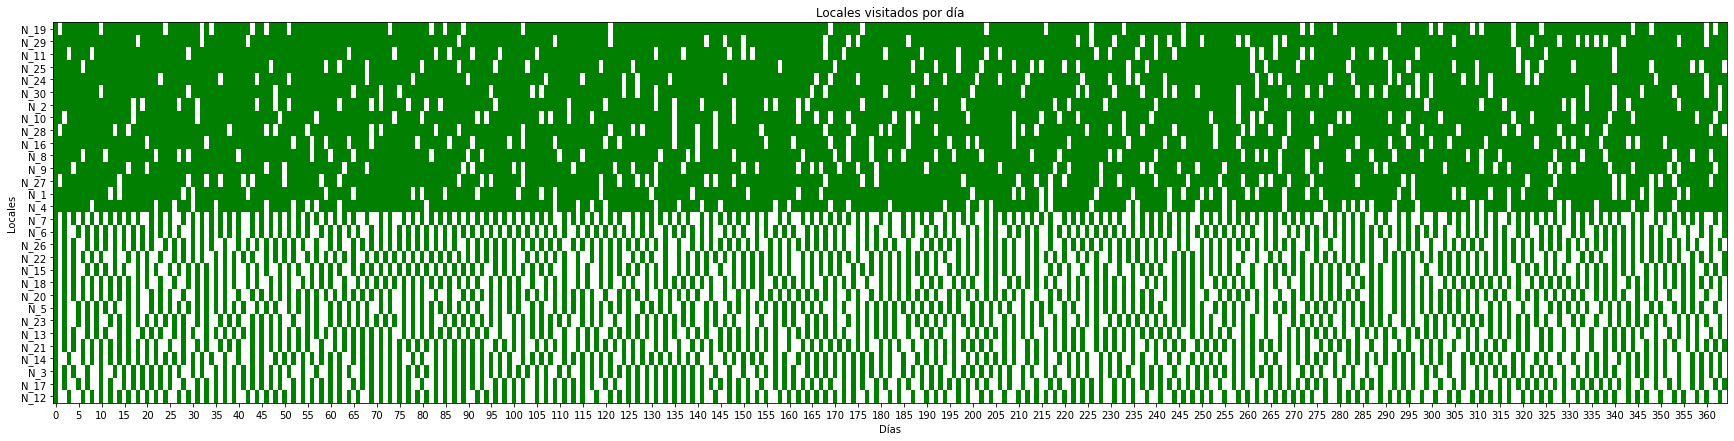

Listo n30empty.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_23', 'N_7', 'N_10', 'N_1', 'N_26', 'N_20', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_29', 'N_13', 'N_4', 'N_22', 'N_2', 'N_9', 'N_8', 'N_14', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2572.6437406282557
Tiempo: 1 | Ruta: ['N_0', 'N_11', 'N_30', 'N_27', 'N_9', 'N_8', 'N_16', 'N_25', 'N_10', 'N_0'] | costo_SO: 408.4014368118648 | costo_r: 1307.3389671994883
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_1', 'N_26', 'N_20', 'N_11', 'N_10', 'N_7', 'N_23', 'N_16', 'N_14', 'N_19', 'N_6', 'N_15', 'N_30', 'N_28', 'N_12', 'N_27', 'N_5', 'N_18', 'N_2', 'N_29', 'N_4', 'N_22', 'N_0'] | costo_SO: 317.87858439759816 | costo_r: 2176.304982725625

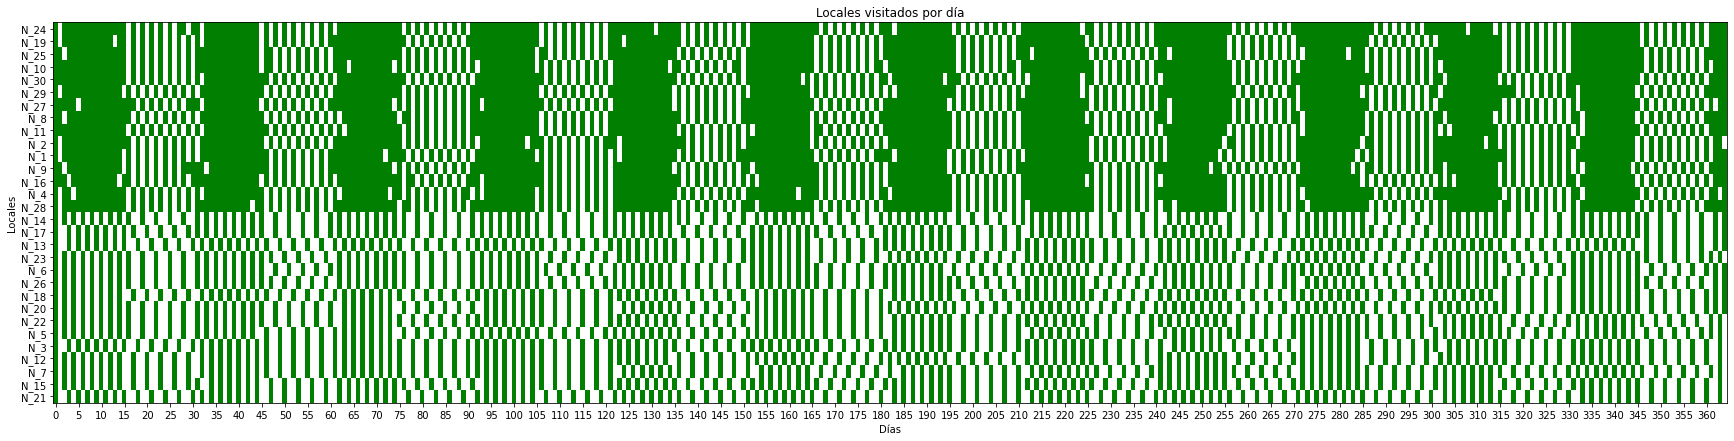

Listo n30empty.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


Tiempo: 0 | Ruta: ['N_0', 'N_11', 'N_10', 'N_0'] | costo_SO: 518.1569845744968 | costo_r: 333.58973139963825
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_3', 'N_28', 'N_30', 'N_12', 'N_27', 'N_18', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_16', 'N_25', 'N_19', 'N_6', 'N_10', 'N_1', 'N_26', 'N_0'] | costo_SO: 98.65398308280677 | costo_r: 1876.273540054134
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_20', 'N_24', 'N_11', 'N_30', 'N_15', 'N_17', 'N_7', 'N_10', 'N_23', 'N_16', 'N_14', 'N_25', 'N_27', 'N_5', 'N_9', 'N_2', 'N_29', 'N_22', 'N_0'] | costo_SO: 48.350535483359366 | costo_r: 2147.177902362171
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_26', 'N_2', 'N_4', 'N_8', 'N_16', 'N_25', 'N_19', 'N_27', 

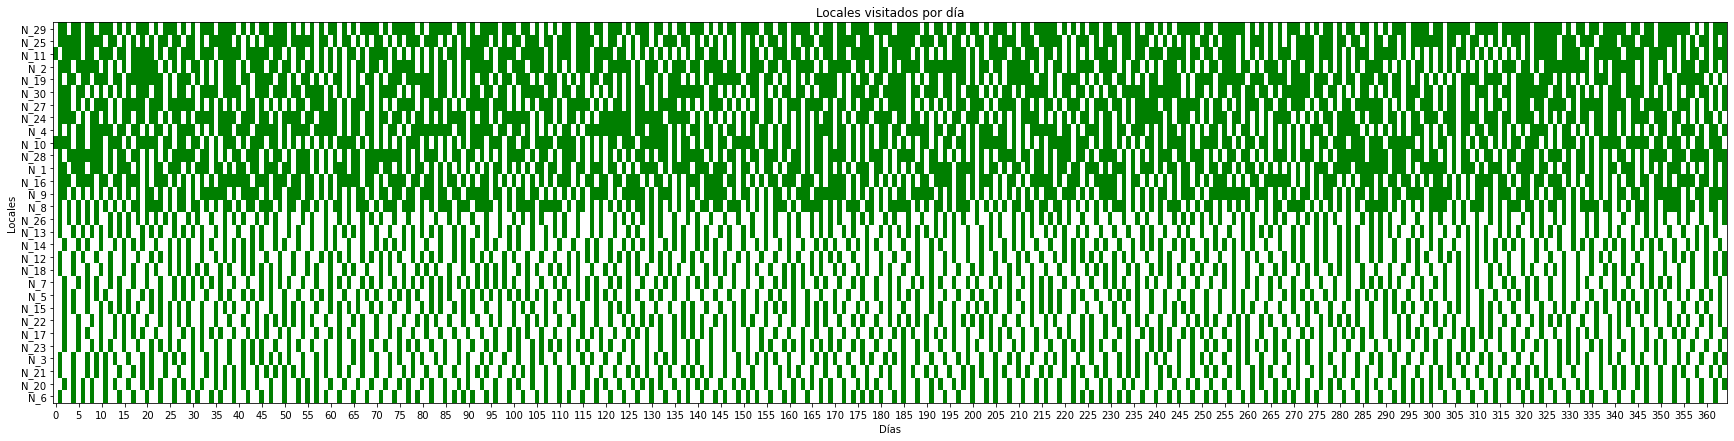

Listo n30estandar.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_25', 'N_19', 'N_27', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 1747.6190196632908
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_20', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_12', 'N_27', 'N_18', 'N_2', 'N_21', 'N_22', 'N_29', 'N_13', 'N_8', 'N_14', 'N_19', 'N_16', 'N_0'] | costo_SO: 0 | costo_r: 2427.7840350638144
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_25', 'N_19', 'N_27', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0'] | costo_SO: 0 | costo_r: 1747.6190196632908
Tiempo: 3 | Ruta: ['N_0'

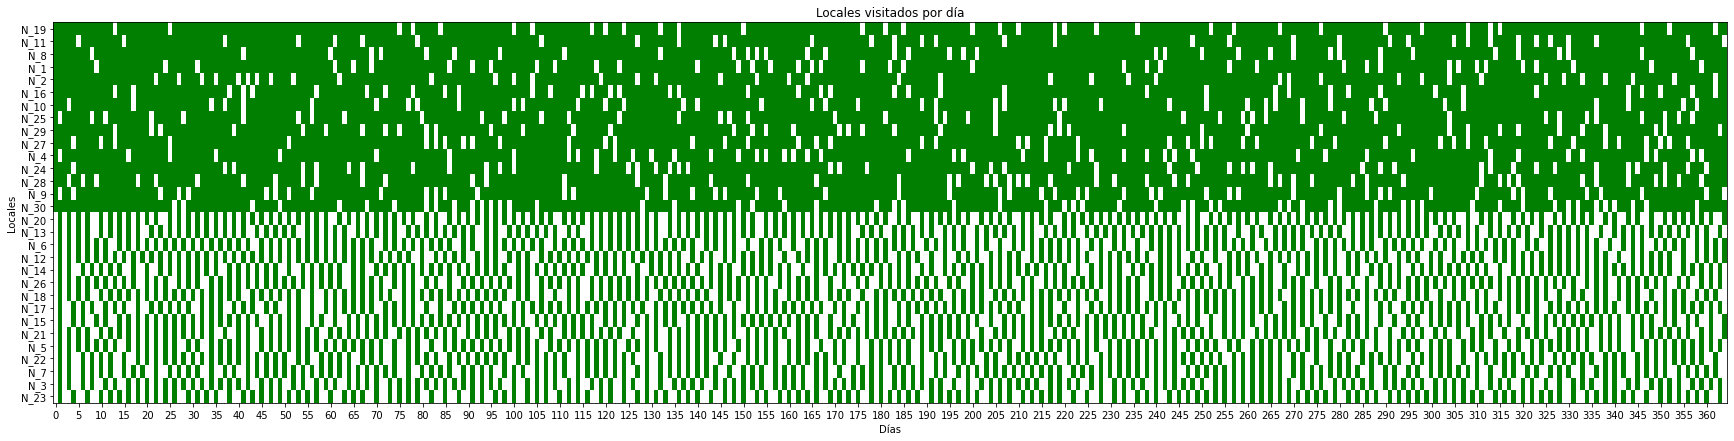

Listo n30estandar.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 447.8548740373234 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_12', 'N_27', 'N_18', 'N_22', 'N_4', 'N_29', 'N_2', 'N_9', 'N_8', 'N_16', 'N_19', 'N_25', 'N_17', 'N_10', 'N_1', 'N_0'] | costo_SO: 275.07422370293375 | costo_r: 1841.7843554372062
Tiempo: 2 | Ruta: ['N_0', 'N_26', 'N_20', 'N_24', 'N_28', 'N_30', 'N_27', 'N_5', 'N_21', 'N_2', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_6', 'N_15', 'N_7', 'N_23', 'N_16', 'N_0'] | costo_SO: 45.9495619344834 | costo_r: 2314.358480429558
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_12', 'N_27', 'N_18', 'N_2',

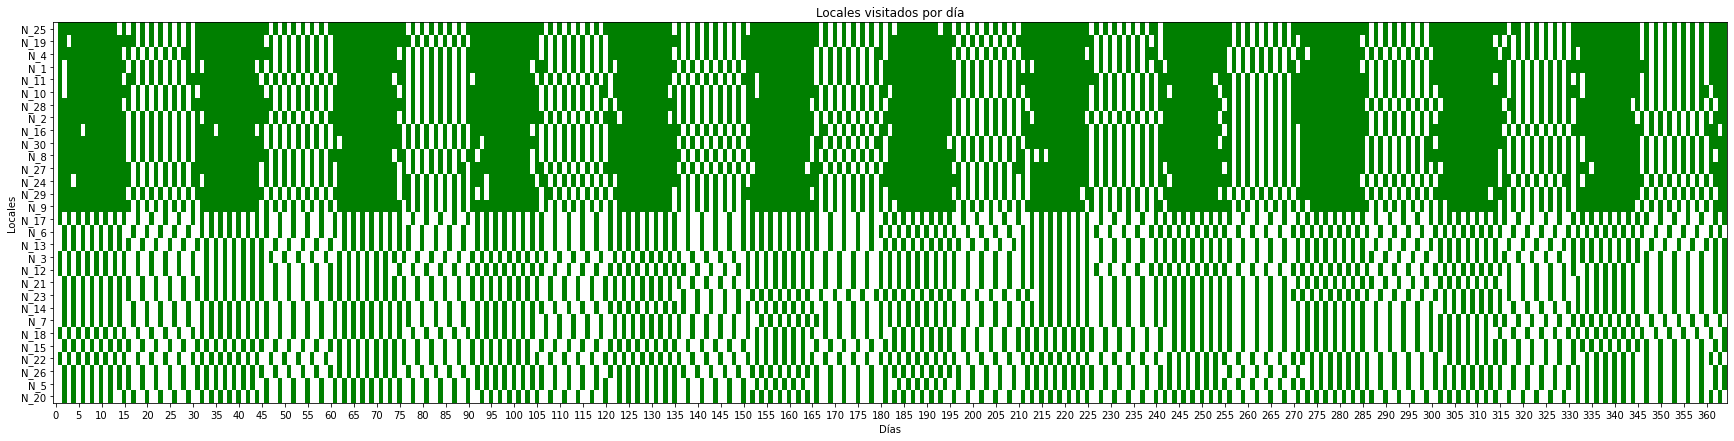

Listo n30estandar.xlsx con demanda o
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_17', 'N_30', 'N_11', 'N_20', 'N_21', 'N_22', 'N_4', 'N_13', 'N_8', 'N_9', 'N_2', 'N_5', 'N_12', 'N_15', 'N_6', 'N_25', 'N_19', 'N_16', 'N_0'] | costo_SO: 75.33373570035886 | costo_r: 2072.3289165319056
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_3', 'N_26', 'N_1', 'N_10', 'N_28', 'N_27', 'N_18', 'N_29', 'N_14', 'N_23', 'N_0'] | costo_SO: 0 | costo_r: 1703.9855697749244
Tiempo: 4 | Ruta: ['N_0', 'N_11', 'N_7', 'N_17', 'N_15', 'N_19', 'N_4', 'N_0'] | costo_SO: 223.79130277772913 | costo_r: 1110.540074

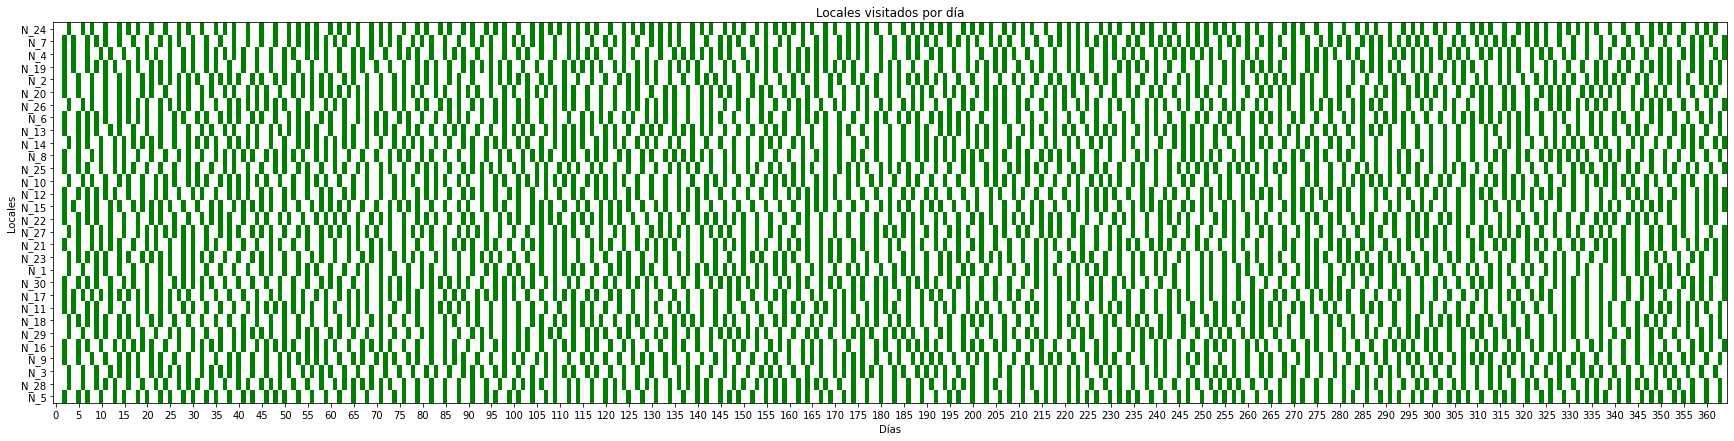

Listo n30full.xlsx con demanda n
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_10', 'N_23', 'N_17', 'N_6', 'N_25', 'N_16', 'N_14', 'N_8', 'N_9', 'N_13', 'N_29', 'N_22', 'N_2', 'N_18', 'N_5', 'N_27', 'N_12', 'N_15', 'N_28', 'N_3', 'N_20', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 2081.8529436895587
Tiempo: 3 | Ruta: ['N_0', 'N_11', 'N_7', 'N_30', 'N_19', 'N_4', 'N_21', 'N_26', 'N_0'] | costo_SO: 0 | costo_r: 1239.3812338074288
Tiempo: 4 | Ruta: ['N_0', 'N_10', 'N_1', 'N_20', 'N_24', 'N_3', 'N_28', 'N_15', 'N_17', 'N_6', 'N_27', 'N_5', 'N_18', 'N_16', 'N_14', 'N_8', 'N_9', 'N_2

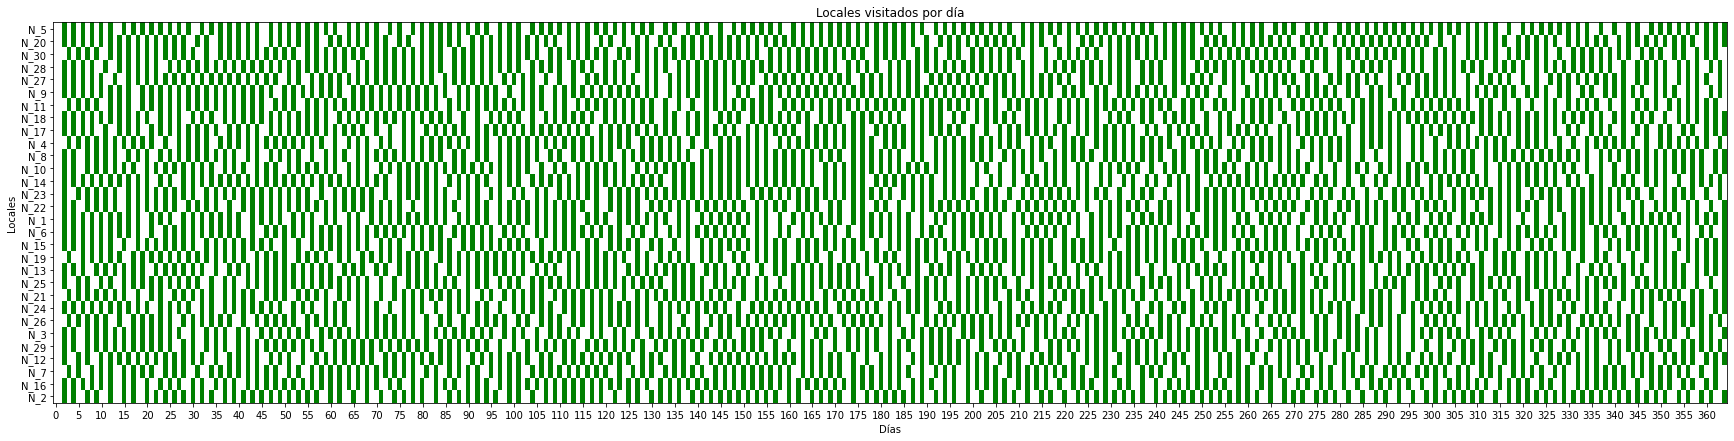

Listo n30full.xlsx con demanda c
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
No hay locales que visitar
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 2 | Ruta: ['N_0', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_16', 'N_14', 'N_8', 'N_9', 'N_18', 'N_21', 'N_29', 'N_22', 'N_26', 'N_1', 'N_0'] | costo_SO: 369.05055283795014 | costo_r: 1540.4085151098304
Tiempo: 3 | Ruta: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_10', 'N_7', 'N_23', 'N_25', 'N_19', 'N_27', 'N_12', 'N_5', 'N_2', 'N_13', 'N_4', 'N_0'] | costo_SO: 0 | costo_r: 1571.4172783526972
Tiempo: 4 | Ruta: ['N_0', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_16', 'N_14', 'N_8', 'N_9', 'N_18', 'N_21', 'N_29', 'N_22', 'N_26', 

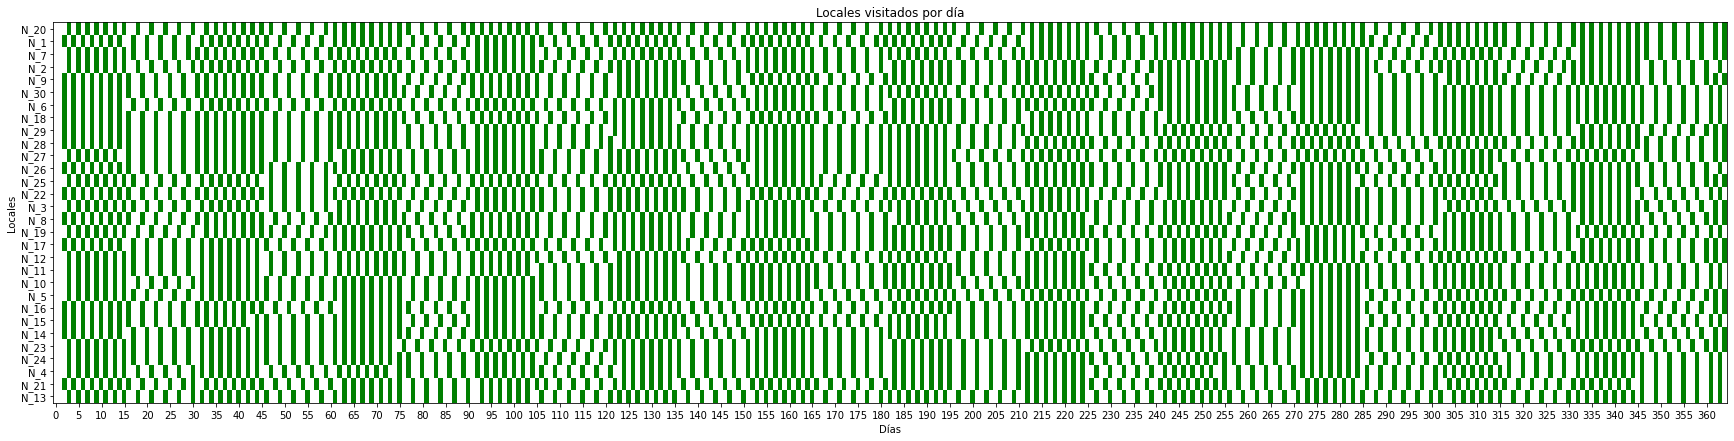

Listo n30full.xlsx con demanda o


In [ ]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
demandas = ['n', 'c', 'o']#,'d']
datos_R_sim = {}
df_costos = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output_tablero = f'plots//tablero_R_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R_modificada(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_R_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R,
                                            'costos': costos_R, 'demanda': dems_R}
            costos_consolidados = calcular_costo_consolidado(costos_R, inventarios_R)
            df_costos = pd.concat([df_costos, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1

            df_rutas = generar_df(rutas_R, N)
            plotear_tablero_visitas(df_rutas, guardar = True, nombre = output_tablero)
            print (f'Listo {file_name} con demanda {dem}')

df_costos.to_csv('costos_R.csv')

json.dump(datos_R_sim, open('datos_R_sim.json', 'w'))

### Simulación P



Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_8', 'N_5', 'N_5', 'N_7', 'N_10', 'N_9', 'N_5', 'N_1', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_8', 'N_5', 'N_7', 'N_10', 'N_9', 'N_1', 'N_0'] | costo_SO: 166.8265155616847 | costo_r: 1629.246635738166


Inicial LS: ['N_0', 'N_4', 'N_2', 'N_3', 'N_6', 'N_0'], costo SO = 3759451.600270561
Final LS: [['N_0', 'N_1', 'N_9', 'N_9', 'N_4', 'N_3', 'N_7', 'N_2']], costo SO = 1319766.5012785662
Tiempo: 1 | Ruta: ['N_0', 'N_1', 'N_9', 'N_4', 'N_3', 'N_7', 'N_2', 'N_0'] | costo_SO: 69.6667756559901 | costo_r: 1432.1146179739194


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_6', 'N_0'], costo SO = 1140756.3712166026
Final LS: [['N_0', 'N_8', 'N_9', 'N_5', 'N_3', 'N_4']], costo SO = 0.0
Tiempo: 2 | Ruta: ['N_0', 'N_8', 'N_9', 'N_5', 'N_3', 'N_4', 'N_0'] | costo_SO: 248.9473378510954 | costo_r: 1838.0273748921743


Inicial LS: ['N_0', '

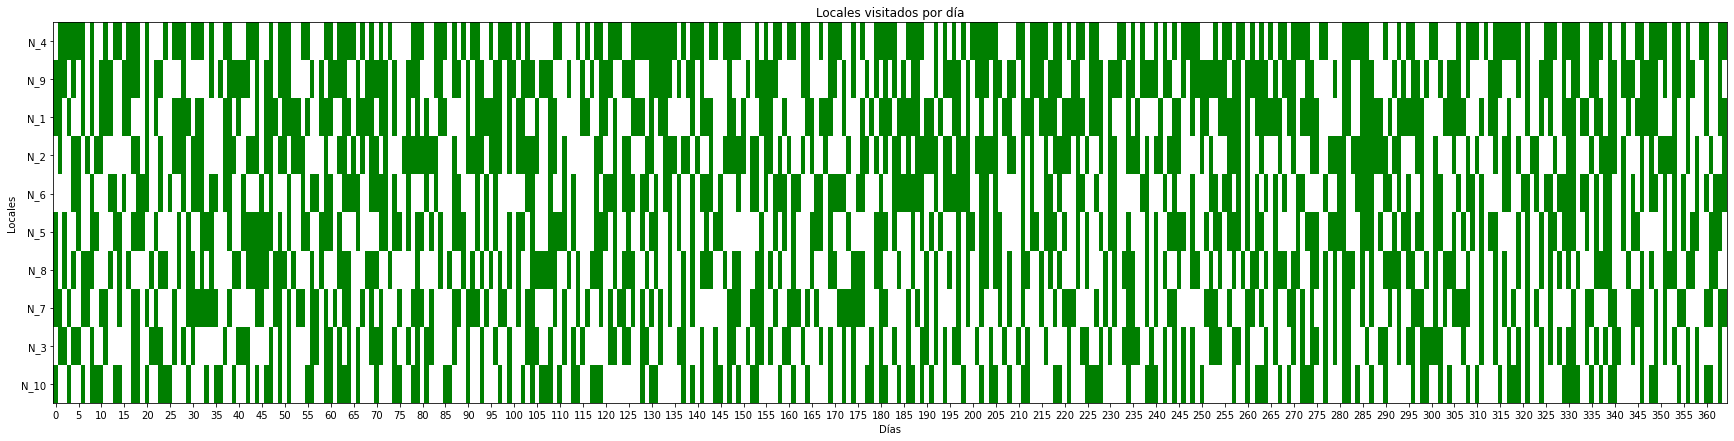

Listo n10empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_10', 'N_8', 'N_1', 'N_9', 'N_8', 'N_7', 'N_3', 'N_2', 'N_4', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_10', 'N_8', 'N_1', 'N_9', 'N_7', 'N_3', 'N_2', 'N_4', 'N_0'] | costo_SO: 140.27829806117455 | costo_r: 1702.5026414827198


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_1', 'N_6', 'N_5', 'N_0'], costo SO = 1072632.4105434169
Final LS: [['N_0', 'N_9', 'N_2', 'N_2', 'N_6', 'N_5']], costo SO = 811459.6673030049
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_2', 'N_6', 'N_5', 'N_0'] | costo_SO: 155.3605966245209 | costo_r: 735.7842749487626


Inicial LS: ['N_0', 'N_4', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_0'], costo SO = 2531197.0459691514
Final LS: [['N_0', 'N_4', 'N_1', 'N_8', 'N_10', 'N_6', 'N_7', 'N_5', 'N_9', 'N_3']], costo SO = 0.0
Tiempo: 2 | Ruta: ['N_0', 'N_4', 'N_1', 'N_8', 'N_10', 'N_6', 'N_7', 'N_5', 'N_9', 'N_3

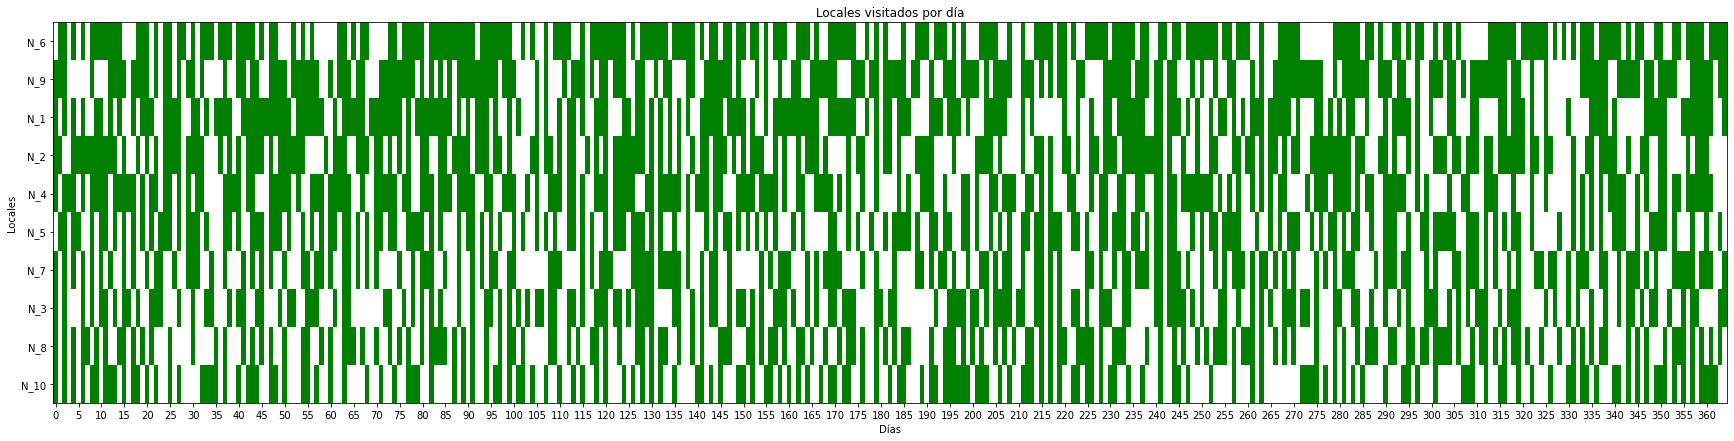

Listo n10empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_7', 'N_5', 'N_1', 'N_4', 'N_6', 'N_8', 'N_3', 'N_5', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_7', 'N_5', 'N_1', 'N_4', 'N_6', 'N_8', 'N_3', 'N_0'] | costo_SO: 172.1799828116869 | costo_r: 2140.4624655005287


Inicial LS: ['N_0', 'N_10', 'N_2', 'N_9', 'N_1', 'N_0'], costo SO = 3682468.750948522
Final LS: {0: ['N_0', 'N_5', 'N_0']}, costo SO = 3682468.750948522
Tiempo: 1 | Ruta: ['N_0', 'N_5', 'N_0'] | costo_SO: 357.9404382238242 | costo_r: 279.5514263959317


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0'], costo SO = 1660937.6483580952
Final LS: {0: ['N_0', 'N_1', 'N_9', 'N_8', 'N_4', 'N_9', 'N_3', 'N_8', 'N_0']}, costo SO = 1660937.6483580952
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_9', 'N_8', 'N_4', 'N_3', 'N_0'] | costo_SO: 260.577405947416 | costo_r: 1639.019535930640

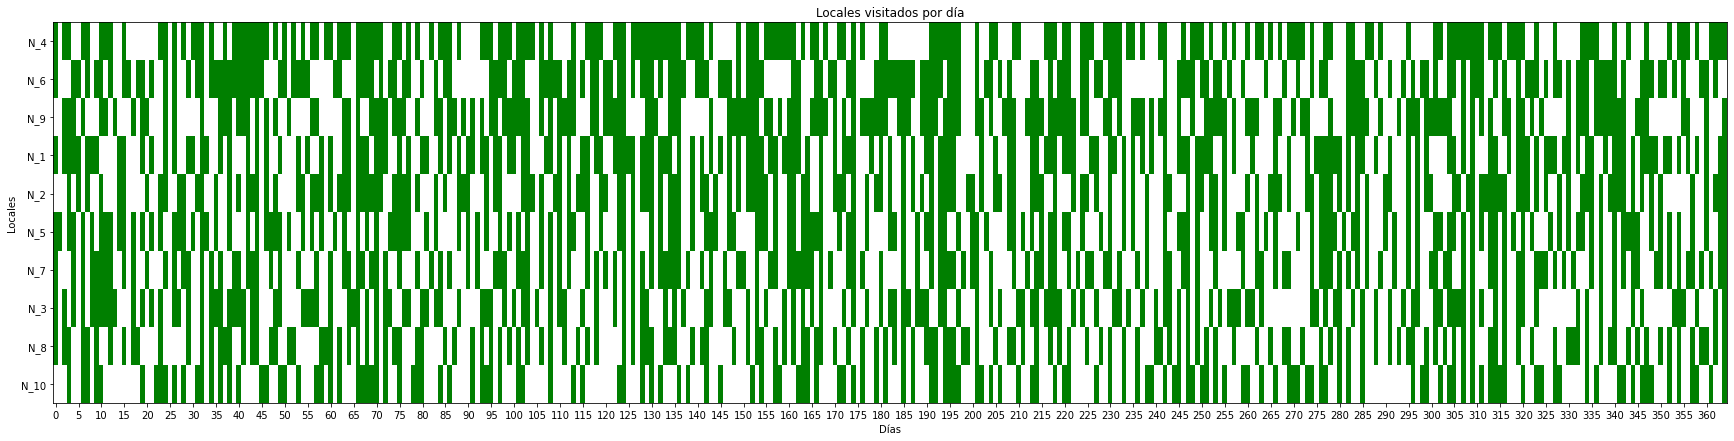

Listo n10empty.xlsx con demanda o


Inicial LS: [], costo SO = 3904720.170704097
Final LS: {0: []}, costo SO = 3904720.170704097
Tiempo: 0 | Ruta: [] | costo_SO: 218.20878605464787 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0'], costo SO = 1045680.9842681357
Final LS: {0: ['N_0', 'N_3', 'N_6', 'N_3', 'N_2', 'N_1', 'N_5', 'N_0']}, costo SO = 1045680.9842681357
Tiempo: 1 | Ruta: ['N_0', 'N_3', 'N_6', 'N_2', 'N_1', 'N_5', 'N_0'] | costo_SO: 141.56256608707972 | costo_r: 1115.6012700370861


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_7', 'N_6', 'N_8', 'N_0'], costo SO = 361623.6862930568
Final LS: {0: ['N_0', 'N_1', 'N_6', 'N_10', 'N_7', 'N_2', 'N_4', 'N_10', 'N_10', 'N_1', 'N_0']}, costo SO = 361623.6862930568
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_6', 'N_10', 'N_7', 'N_2', 'N_4', 'N_0'] | costo_SO: 117.14875396630552 | costo_r: 1522.6805763285288


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_6', 'N_8', 'N_0'], costo SO = 2488231.95

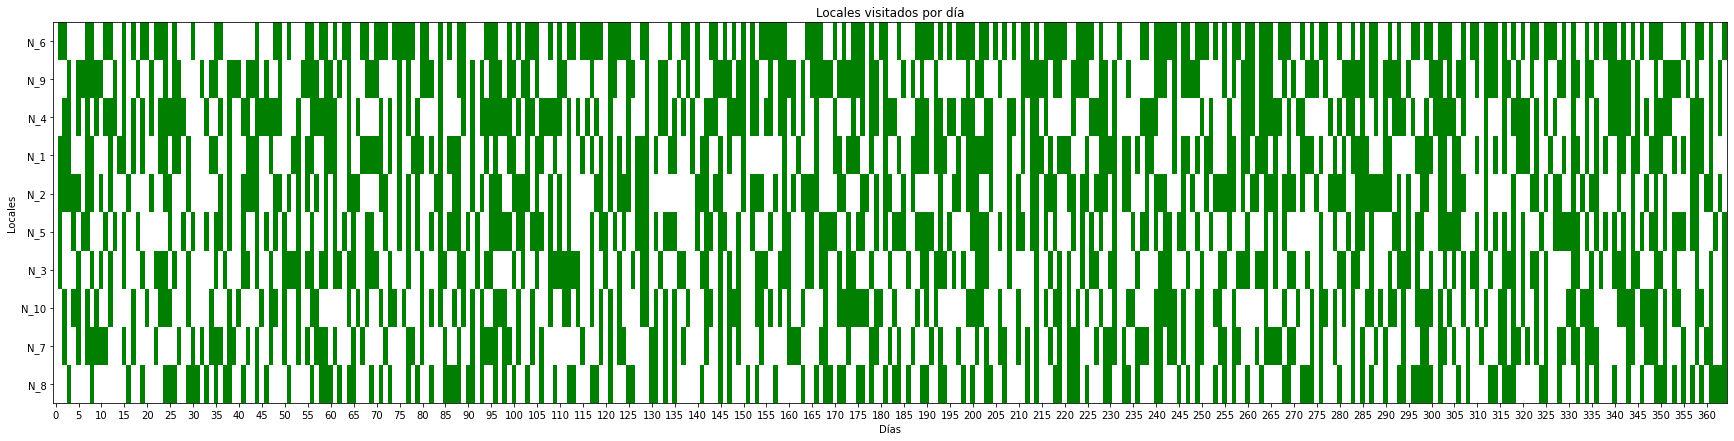

Listo n10estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 800435.0308030667
Final LS: [['N_0', 'N_9', 'N_7', 'N_2', 'N_6', 'N_1']], costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_9', 'N_7', 'N_2', 'N_6', 'N_1', 'N_0'] | costo_SO: 0 | costo_r: 1156.9459854768734


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_2', 'N_2', 'N_9', 'N_4', 'N_6', 'N_3', 'N_2', 'N_8', 'N_9', 'N_1', 'N_0']}, costo SO = 0.0
Tiempo: 1 | Ruta: ['N_0', 'N_2', 'N_9', 'N_4', 'N_6', 'N_3', 'N_8', 'N_1', 'N_0'] | costo_SO: 69.51985415566506 | costo_r: 1614.6777084313615


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_9', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0'], costo SO = 435829.6279829069
Final LS: {0: ['N_0', 'N_10', 'N_6', 'N_9', 'N_4', 'N_3', 'N_9', 'N_9', 'N_5', 'N_3', 'N_1', 'N_2', 'N_4', 'N_0']}, costo SO = 435829.6279829069
Tiempo: 2 | Ruta: ['N_0', 'N_10', 'N_6', 'N_9', 'N_4', 'N_

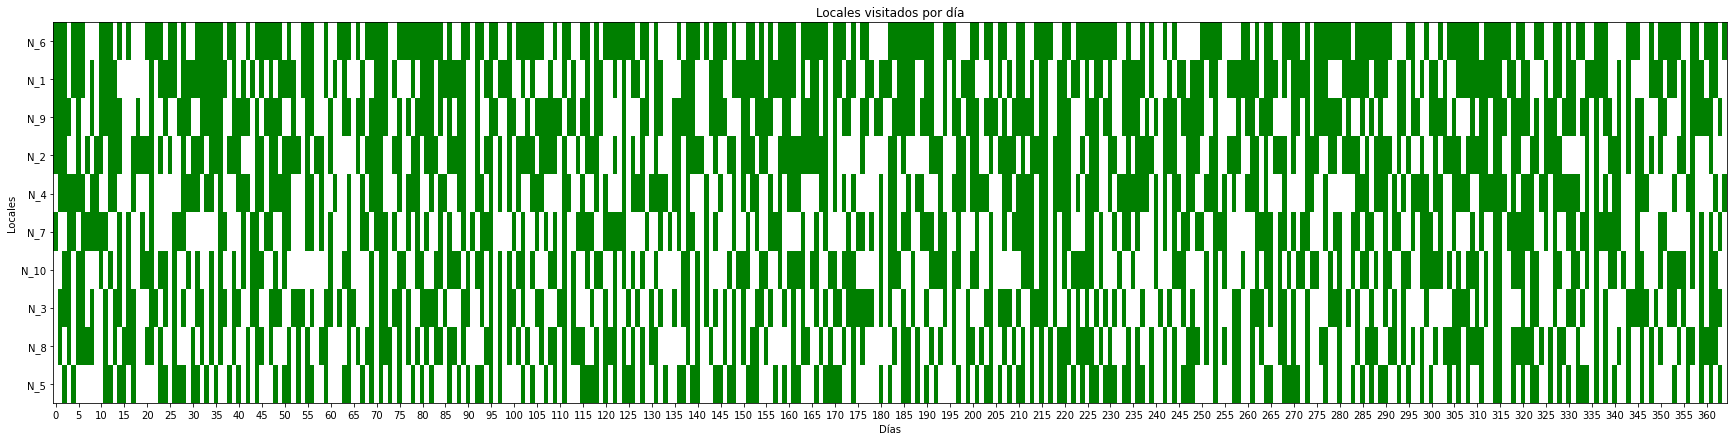

Listo n10estandar.xlsx con demanda c


Inicial LS: ['N_0', 'N_4', 'N_0'], costo SO = 6126581.036038067
Final LS: [['N_0', 'N_10', 'N_4', 'N_9', 'N_7', 'N_8']], costo SO = 3577354.5807314334
Tiempo: 0 | Ruta: ['N_0', 'N_10', 'N_4', 'N_9', 'N_7', 'N_8', 'N_0'] | costo_SO: 188.5497151888614 | costo_r: 1019.695285386797


Inicial LS: ['N_0', 'N_4', 'N_5', 'N_6', 'N_1', 'N_3', 'N_2', 'N_0'], costo SO = 2973365.616970666
Final LS: [['N_0', 'N_2', 'N_6', 'N_7', 'N_1', 'N_10', 'N_9', 'N_6', 'N_9']], costo SO = 1374639.495932245
Tiempo: 1 | Ruta: ['N_0', 'N_2', 'N_6', 'N_7', 'N_1', 'N_10', 'N_9', 'N_0'] | costo_SO: 139.41071635918422 | costo_r: 1082.2510861473384


Inicial LS: ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0'], costo SO = 2055133.2329077253
Final LS: {0: ['N_0', 'N_6', 'N_9', 'N_3', 'N_1', 'N_0']}, costo SO = 2055133.2329077253
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_9', 'N_3', 'N_1', 'N_0'] | costo_SO: 214.79862621673846 | costo_r: 897.6306420196403


Inicial LS: ['N_

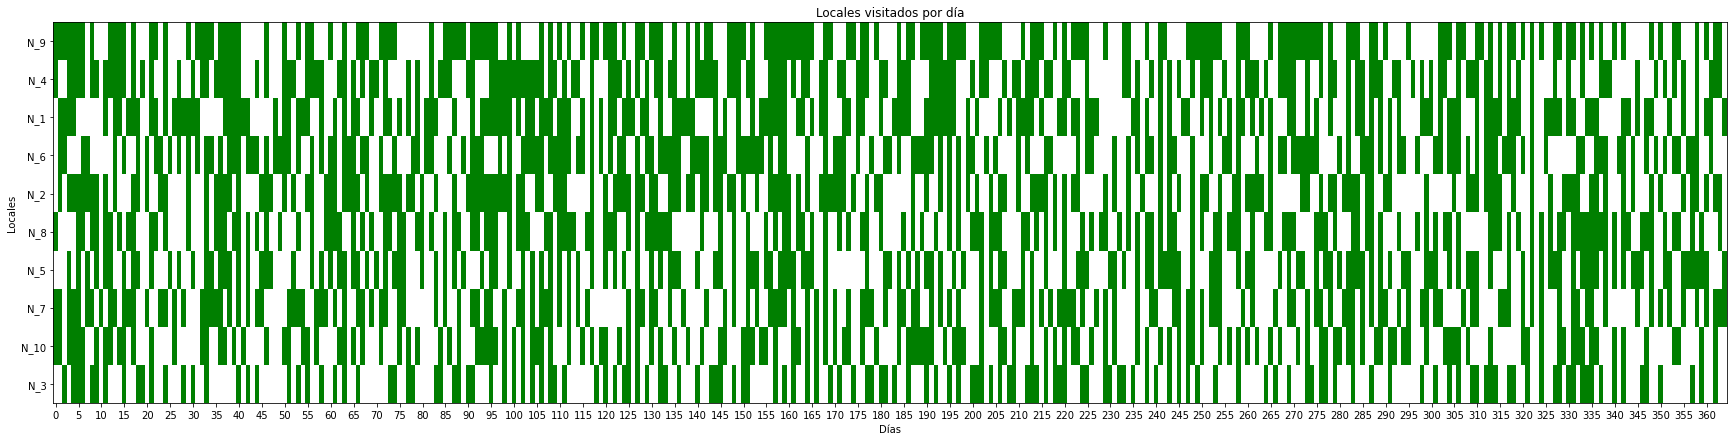

Listo n10estandar.xlsx con demanda o


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 805144.2181885256
Final LS: {0: []}, costo SO = 805144.2181885256
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_9', 'N_6', 'N_0'], costo SO = 839165.5894703154
Final LS: [['N_0', 'N_8', 'N_4', 'N_10', 'N_1', 'N_2', 'N_6', 'N_5']], costo SO = 0.0
Tiempo: 3 | Ruta: ['N_0', 'N_8', 'N_4', 'N_10', 'N_1', 'N_2', 'N_6', 'N_5', 'N_0'] | costo_SO: 0 | costo_r: 1743.5906139192132


Inicial LS: ['N_0', 'N_9', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_1', 'N_9', 'N_8', 'N_0']}, costo SO = 0.0
Tiempo: 4 | Ruta: ['N_0', 'N_1', 'N_9', 'N_8', 'N_0'] | costo_SO: 0 | costo_r: 864.7081659010316


Inicial LS: ['N_0', 'N_7', 'N_0'], costo SO = 683977.6508306944
Final LS: [['N_0', 'N_

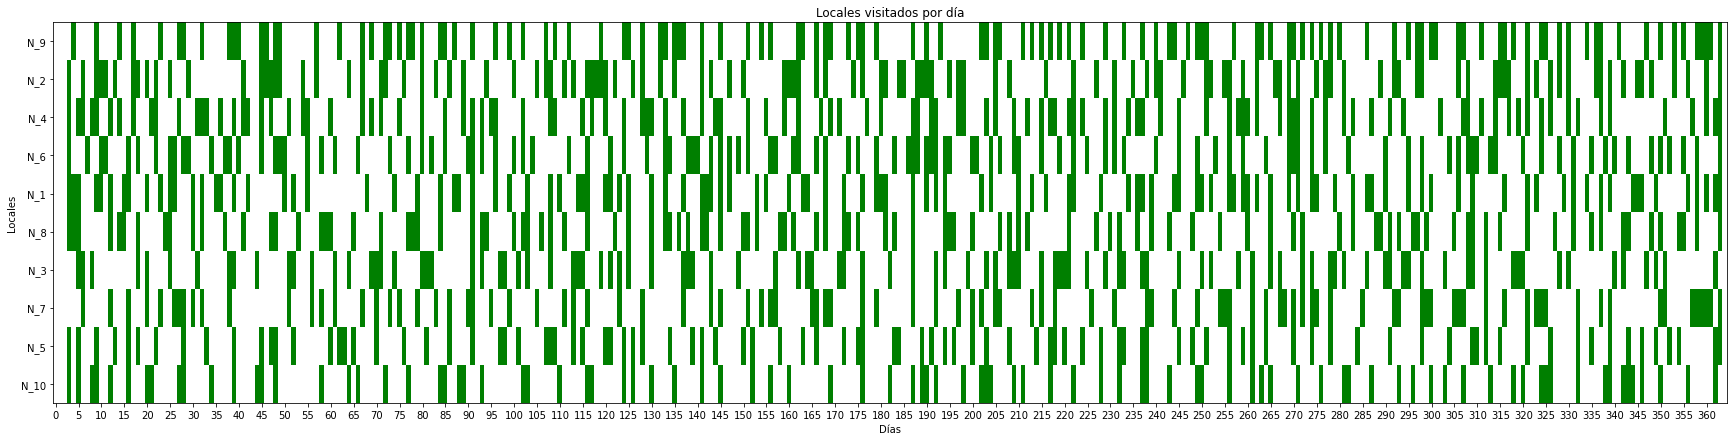

Listo n10full.xlsx con demanda n


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 1250906.4525329578
Final LS: {0: []}, costo SO = 1250906.4525329578
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 268414.6481134565
Final LS: {0: ['N_0', 'N_9', 'N_7', 'N_1', 'N_6', 'N_0']}, costo SO = 268414.6481134565
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_7', 'N_1', 'N_6', 'N_0'] | costo_SO: 0 | costo_r: 831.2507719370207


Inicial LS: ['N_0', 'N_4', 'N_2', 'N_0'], costo SO = 577298.8369818218
Final LS: [['N_0', 'N_8', 'N_3', 'N_6']], costo SO = 359534.26246165566
Tiempo: 4 | Ruta: ['N_0', 'N_8', 'N_3', 'N_6', 'N_0'] | costo_SO: 40.516708633208054 | costo_r: 864.7003911094844


Inicial LS: ['N_0', 'N_4', 'N_10', 'N_2', 'N_5', 'N_

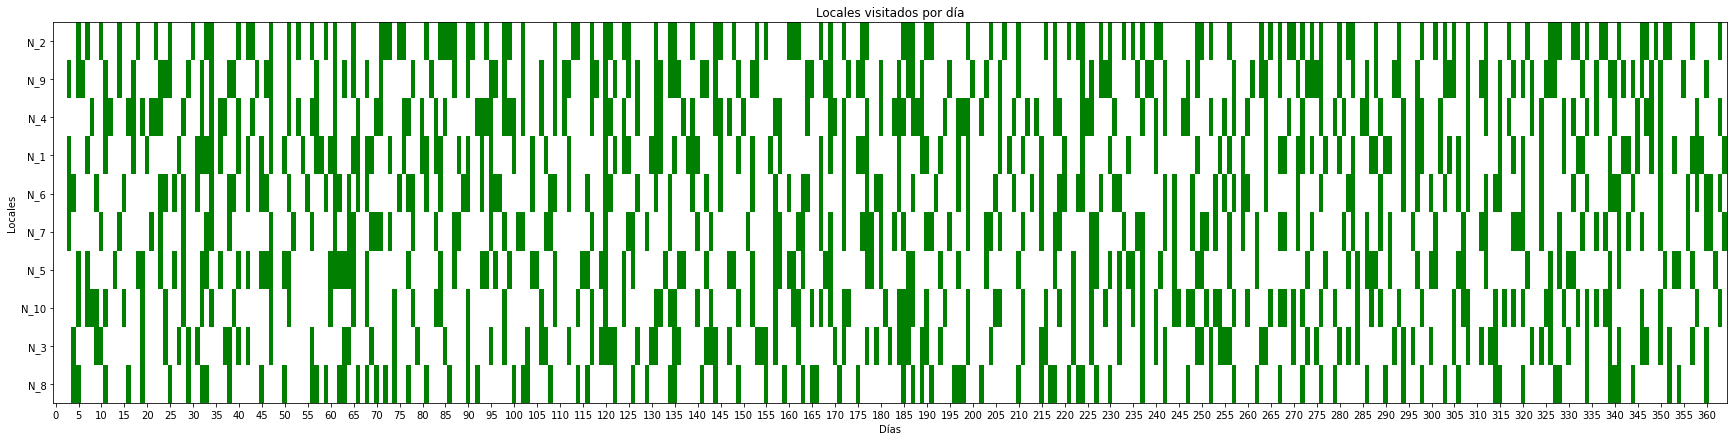

Listo n10full.xlsx con demanda c


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 1782910.1102352154
Final LS: {0: []}, costo SO = 1782910.1102352154
Tiempo: 2 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_4', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 421484.1060124422
Final LS: [['N_0', 'N_4', 'N_7', 'N_4', 'N_3', 'N_4']], costo SO = 0.0
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_7', 'N_3', 'N_0'] | costo_SO: 146.37182629133986 | costo_r: 651.5933677165251


Inicial LS: ['N_0', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'], costo SO = 1007934.4120895362
Final LS: [['N_0', 'N_6', 'N_4', 'N_8', 'N_7', 'N_5', 'N_9']], costo SO = 365985.7154945403
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_4', 'N_8', 'N_7', 'N_5', 'N_9', 'N_0'] | costo_SO: 67.49157063604194 | costo_r: 2057.422702839551


Inic

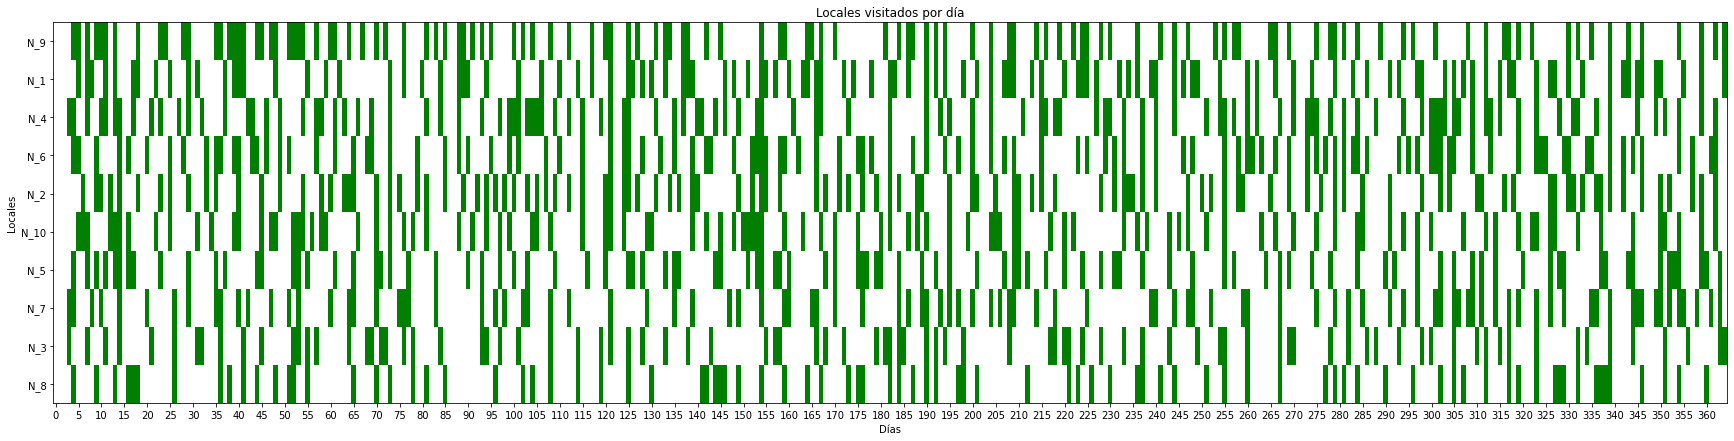

Listo n10full.xlsx con demanda o


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_15', 'N_3', 'N_14', 'N_9', 'N_7', 'N_11', 'N_19', 'N_1', 'N_16', 'N_4', 'N_20', 'N_8', 'N_18', 'N_12', 'N_4', 'N_1', 'N_10', 'N_19', 'N_13', 'N_6', 'N_14', 'N_2', 'N_5', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_15', 'N_3', 'N_14', 'N_9', 'N_7', 'N_11', 'N_19', 'N_1', 'N_16', 'N_4', 'N_20', 'N_8', 'N_18', 'N_12', 'N_10', 'N_13', 'N_6', 'N_2', 'N_5', 'N_0'] | costo_SO: 38.4305269291757 | costo_r: 4437.233857924765


Inicial LS: ['N_0', 'N_11', 'N_17', 'N_10', 'N_7', 'N_0'], costo SO = 7520562.128327272
Final LS: [['N_0', 'N_4', 'N_3', 'N_15', 'N_8', 'N_11', 'N_9', 'N_5', 'N_12', 'N_14', 'N_18', 'N_17']], costo SO = 3276058.025759548
Tiempo: 1 | Ruta: ['N_0', 'N_4', 'N_3', 'N_15', 'N_8', 'N_11', 'N_9', 'N_5', 'N_12', 'N_14', 'N

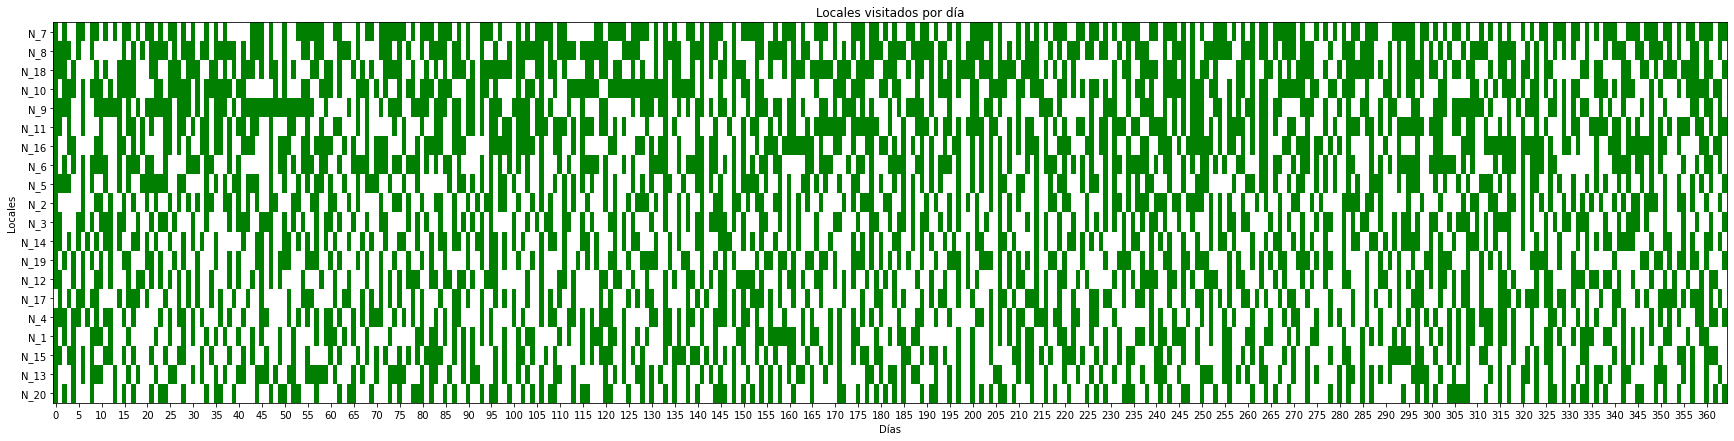

Listo n20empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_3', 'N_9', 'N_16', 'N_20', 'N_13', 'N_17', 'N_2', 'N_17', 'N_1', 'N_5', 'N_19', 'N_18', 'N_18', 'N_16', 'N_8', 'N_7', 'N_4', 'N_10', 'N_8', 'N_15', 'N_16', 'N_5', 'N_11', 'N_1', 'N_14', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_9', 'N_16', 'N_20', 'N_13', 'N_17', 'N_2', 'N_1', 'N_5', 'N_19', 'N_18', 'N_8', 'N_7', 'N_4', 'N_10', 'N_15', 'N_11', 'N_14', 'N_0'] | costo_SO: 103.17656293089907 | costo_r: 3764.305462949159


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_12', 'N_10', 'N_7', 'N_0'], costo SO = 2748140.3570788912
Final LS: {0: ['N_0', 'N_11', 'N_11', 'N_11', 'N_6', 'N_8', 'N_10', 'N_18', 'N_15', 'N_0']}, costo SO = 2748140.3570788912
Tiempo: 1 | Ruta: ['N_0', 'N_11', 'N_6', 'N_8', 'N_10',

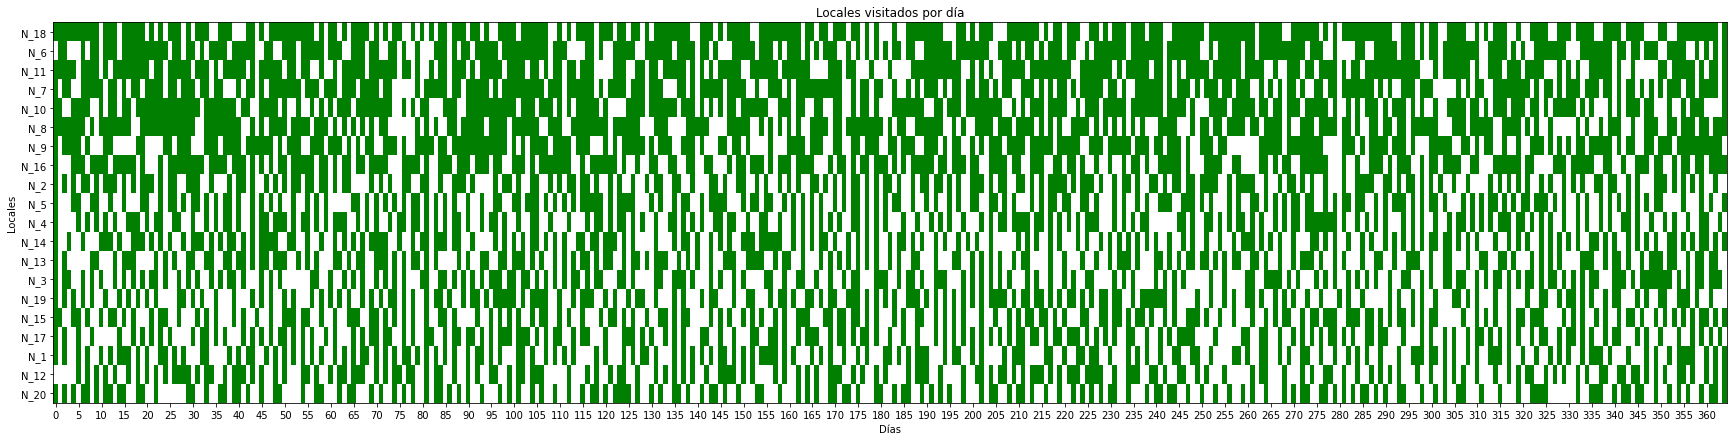

Listo n20empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_13', 'N_1', 'N_2', 'N_17', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_4', 'N_5', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_10', 'N_3', 'N_13', 'N_5', 'N_9', 'N_19', 'N_15', 'N_17', 'N_16', 'N_6', 'N_17', 'N_4', 'N_20', 'N_14', 'N_1', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_10', 'N_3', 'N_13', 'N_5', 'N_9', 'N_19', 'N_15', 'N_17', 'N_16', 'N_6', 'N_4', 'N_20', 'N_14', 'N_1', 'N_0'] | costo_SO: 296.05709954403073 | costo_r: 3569.2928174354693


Inicial LS: ['N_0', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_12', 'N_7', 'N_2', 'N_0'], costo SO = 7874182.8268298535
Final LS: [['N_0', 'N_17', 'N_16', 'N_10', 'N_18', 'N_7', 'N_4', 'N_14', 'N_12', 'N_11', 'N_15', 'N_2']], costo SO = 5072398.897326526
Tiempo: 1 | Ruta: ['N_0', 'N_17', 'N_16', 'N_10', 'N_18', 'N_7', 'N_4', 'N_14', 'N_12', 'N_11', 'N_15', 'N_2', 'N_0'] | costo_SO: 43.76979622046282 | costo

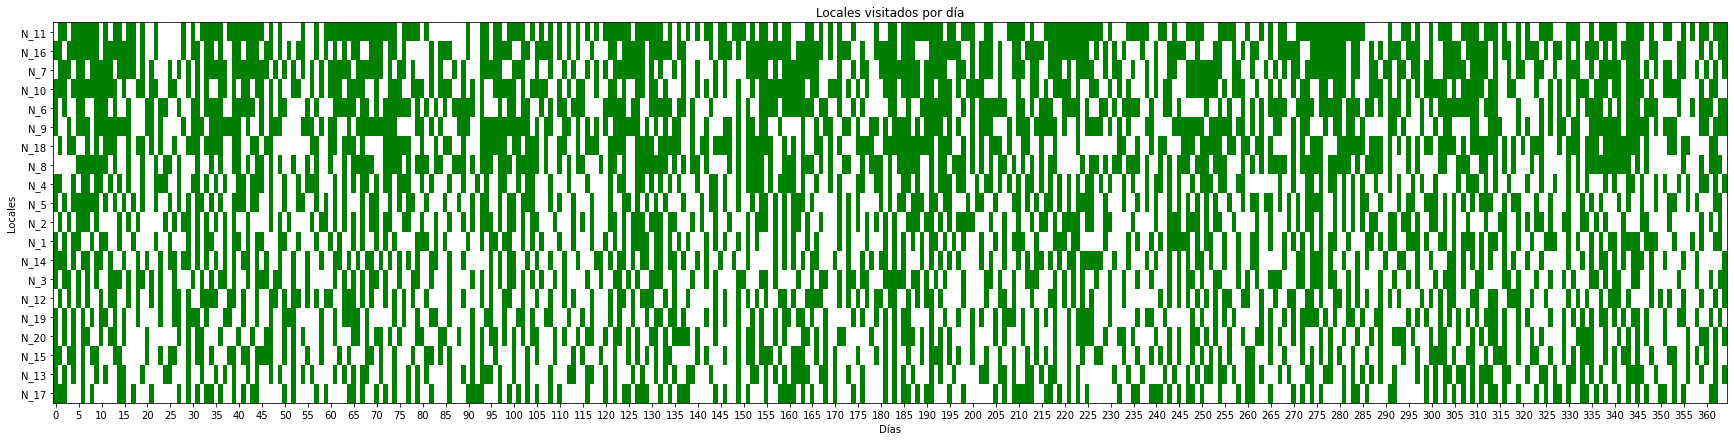

Listo n20empty.xlsx con demanda o


Inicial LS: ['N_0', 'N_11', 'N_0'], costo SO = 8442352.71478615
Final LS: [['N_0', 'N_11', 'N_13', 'N_18']], costo SO = 7747406.241422869
Tiempo: 0 | Ruta: ['N_0', 'N_11', 'N_13', 'N_18', 'N_0'] | costo_SO: 100.76830938694292 | costo_r: 445.6505734793632


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_17', 'N_16', 'N_19', 'N_1', 'N_10', 'N_7', 'N_0'], costo SO = 5237804.254283773
Final LS: [['N_0', 'N_11', 'N_16', 'N_19', 'N_9', 'N_17', 'N_13', 'N_4', 'N_5', 'N_7']], costo SO = 3789953.5942708463
Tiempo: 1 | Ruta: ['N_0', 'N_11', 'N_16', 'N_19', 'N_9', 'N_17', 'N_13', 'N_4', 'N_5', 'N_7', 'N_0'] | costo_SO: 392.642880043971 | costo_r: 1629.1008517429436


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_11', 'N_8', 'N_20', 'N_1', 'N_2', 'N_18', 'N_16', 'N_12', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0'], costo SO = 2425483.784856147
Final LS: [['N_0', 'N_18', 'N_6', 'N_14', 'N_1', 'N_12', 'N_2', 'N_4', 'N_8', 'N_20', 'N_3', 'N_10', 'N_7', 'N_11', 'N_16', 

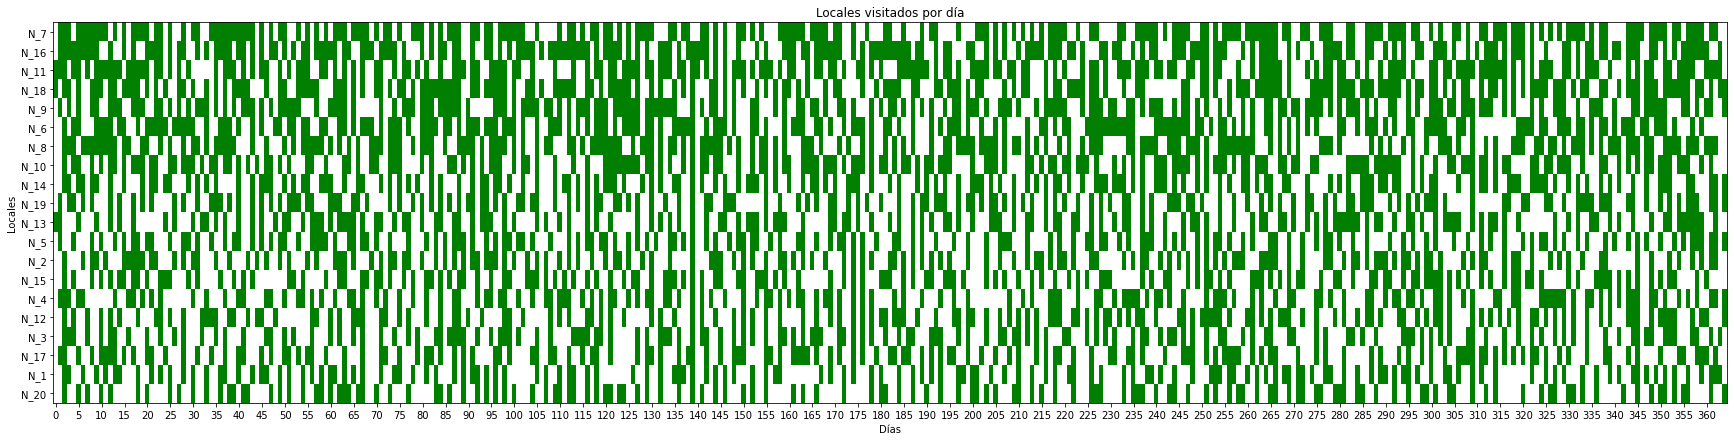

Listo n20estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 2559429.430757888
Final LS: [['N_0', 'N_14', 'N_2', 'N_13', 'N_15', 'N_5', 'N_19', 'N_11', 'N_6', 'N_7', 'N_16', 'N_8', 'N_9', 'N_18']], costo SO = 1196576.8943216687
Tiempo: 0 | Ruta: ['N_0', 'N_14', 'N_2', 'N_13', 'N_15', 'N_5', 'N_19', 'N_11', 'N_6', 'N_7', 'N_16', 'N_8', 'N_9', 'N_18', 'N_0'] | costo_SO: 87.16614236449774 | costo_r: 3636.1450763997063


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_17', 'N_18', 'N_16', 'N_12', 'N_1', 'N_4', 'N_10', 'N_0'], costo SO = 1249512.5051805652
Final LS: [['N_0', 'N_8', 'N_6', 'N_7', 'N_9', 'N_1', 'N_3', 'N_11', 'N_5', 'N_4', 'N_20', 'N_12', 'N_17', 'N_15', 'N_10']], costo SO = 1048205.2527627827
Tiempo: 1 | Ruta: ['N_0', 'N_8', 'N_6', 'N_7', 'N_9', 'N_1', 'N_3', 'N_11', 'N_5', 'N_4', 'N_20', 'N_12', 'N_17', 'N_15', 'N_10', 'N_0'] | costo_SO: 80.23337905524716 | costo_r: 2839.95507509

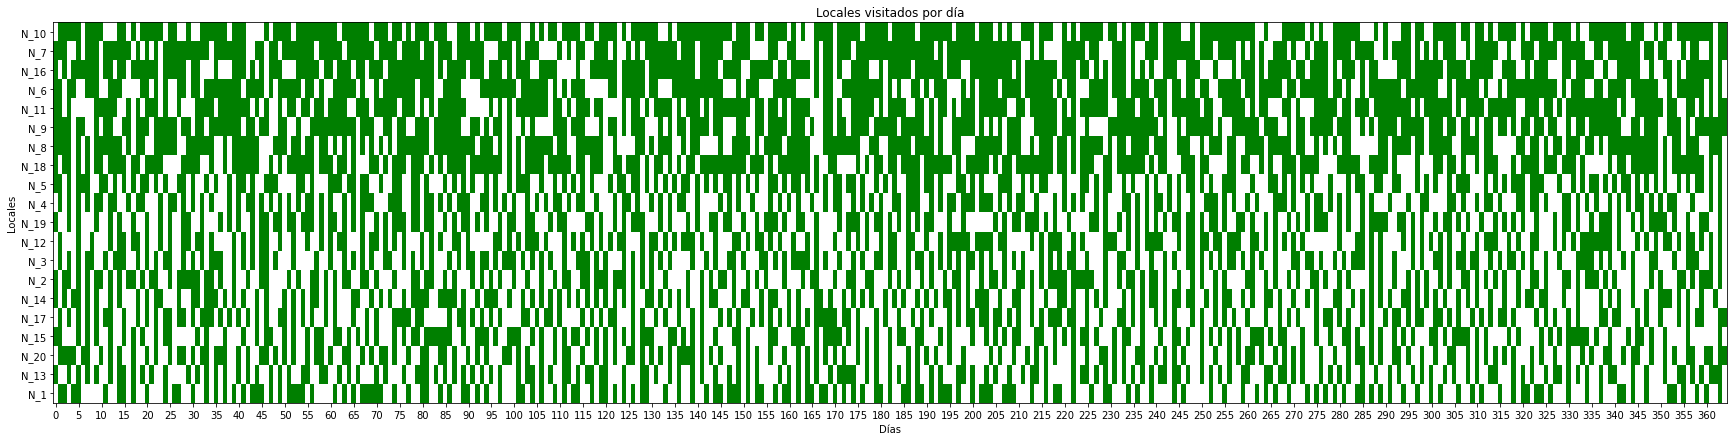

Listo n20estandar.xlsx con demanda c


Inicial LS: [], costo SO = 12991638.202031698
Final LS: {0: []}, costo SO = 12991638.202031698
Tiempo: 0 | Ruta: [] | costo_SO: 251.2713972537084 | costo_r: 0


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_17', 'N_18', 'N_16', 'N_19', 'N_2', 'N_5', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0'], costo SO = 2366019.328861089
Final LS: [['N_0', 'N_18', 'N_7', 'N_8', 'N_11', 'N_17', 'N_16', 'N_4', 'N_15', 'N_20', 'N_9', 'N_19', 'N_3', 'N_14']], costo SO = 1476171.9697078548
Tiempo: 1 | Ruta: ['N_0', 'N_18', 'N_7', 'N_8', 'N_11', 'N_17', 'N_16', 'N_4', 'N_15', 'N_20', 'N_9', 'N_19', 'N_3', 'N_14', 'N_0'] | costo_SO: 357.9417295528297 | costo_r: 3163.471800502375


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_8', 'N_13', 'N_1', 'N_2', 'N_16', 'N_12', 'N_10', 'N_7', 'N_5', 'N_0'], costo SO = 5931975.313955049
Final LS: [['N_0', 'N_20', 'N_6', 'N_8', 'N_11', 'N_10', 'N_4', 'N_12', 'N_16', 'N_11', 'N_1', 'N_2', 'N_14', 'N_6', 'N_18', 'N_12', 'N_5']],

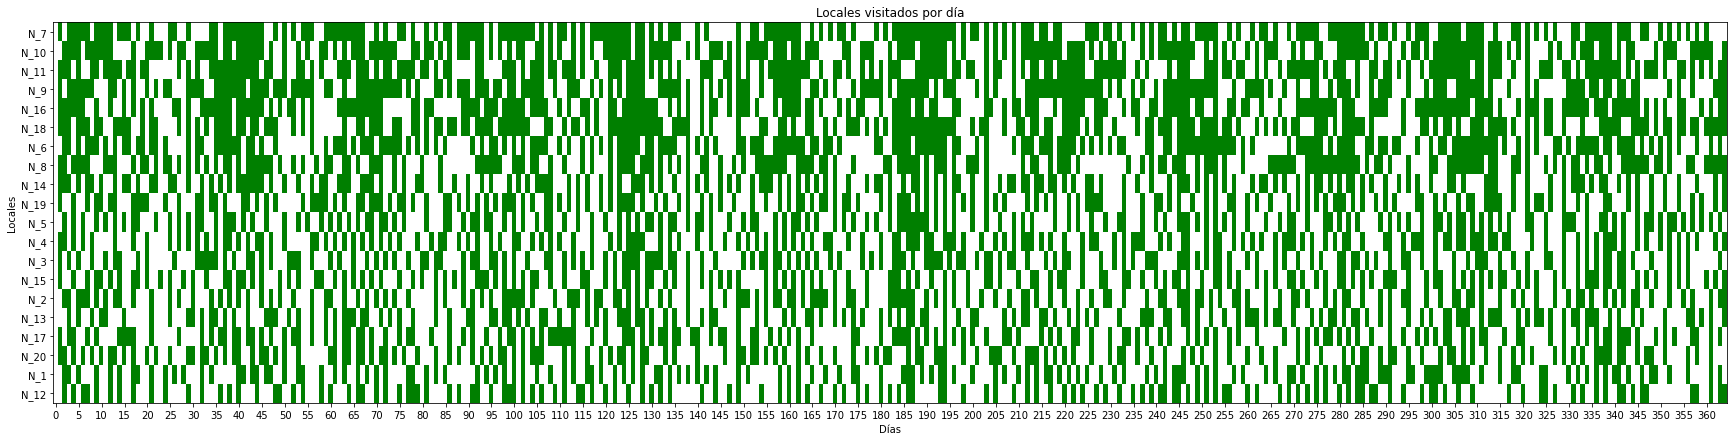

Listo n20estandar.xlsx con demanda o


Inicial LS: [], costo SO = 2121684.9221759876
Final LS: {0: []}, costo SO = 2121684.9221759876
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_7', 'N_0'], costo SO = 6398490.251015983
Final LS: [['N_0', 'N_17', 'N_13', 'N_7', 'N_7', 'N_11', 'N_13', 'N_18']], costo SO = 5884931.082784665
Tiempo: 1 | Ruta: ['N_0', 'N_17', 'N_13', 'N_7', 'N_11', 'N_18', 'N_0'] | costo_SO: 118.44285657015766 | costo_r: 1261.9450534120156


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_8', 'N_20', 'N_1', 'N_18', 'N_16', 'N_12', 'N_19', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0'], costo SO = 4524268.79725712
Final LS: [['N_0', 'N_6', 'N_7', 'N_9', 'N_20', 'N_10', 'N_11', 'N_13', 'N_4', 'N_15', 'N_17', 'N_1', 'N_14']], costo SO = 2429415.6198547715
Tiempo: 2 | Ruta: ['N_0', 'N_6', 'N_7', 'N_9', 'N_20', 'N_10', 'N_11', 'N_13', 'N_4', 'N_15', 'N_17', 'N_1', 'N_14', 'N_0'] | costo_SO: 354.65715260033755 | costo_r: 2921.5

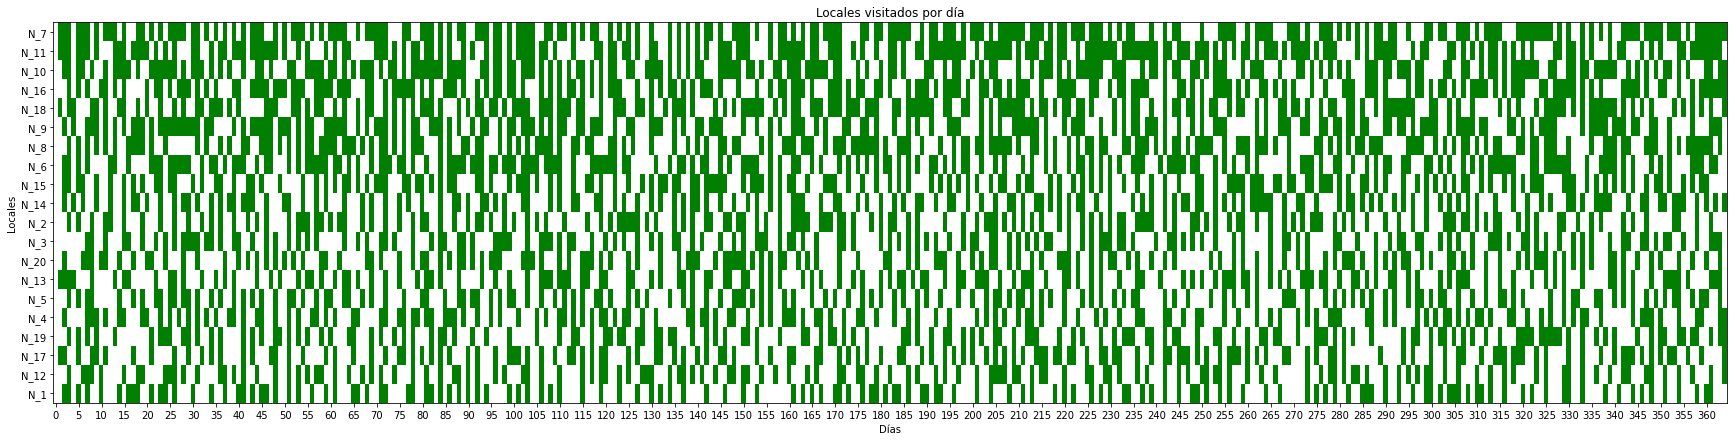

Listo n20full.xlsx con demanda n


Inicial LS: [], costo SO = 2278188.8166083
Final LS: {0: []}, costo SO = 2278188.8166083
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_10', 'N_7', 'N_0'], costo SO = 3233003.023073984
Final LS: [['N_0', 'N_6', 'N_9', 'N_5', 'N_11', 'N_19', 'N_17', 'N_18', 'N_10', 'N_16', 'N_13', 'N_20', 'N_1', 'N_18', 'N_8', 'N_13', 'N_7']], costo SO = 1499514.990911957
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_9', 'N_5', 'N_11', 'N_19', 'N_17', 'N_18', 'N_10', 'N_16', 'N_13', 'N_20', 'N_1', 'N_8', 'N_7', 'N_0'] | costo_SO: 0 | costo_r: 2515.5754975718737


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_18', 'N_16', 'N_12', 'N_10', 'N_7', 'N_14', 'N_4', 'N_0'], costo SO = 3218067.496959357
Final LS: [['N_0', 'N_9', 'N_6', 'N_13', 'N_4']], costo SO = 3163112.014288106
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_6', 'N_13', 'N_4', 'N_0'] | costo_SO: 299.74003056661576 | costo_r: 488.628365145257


Ini

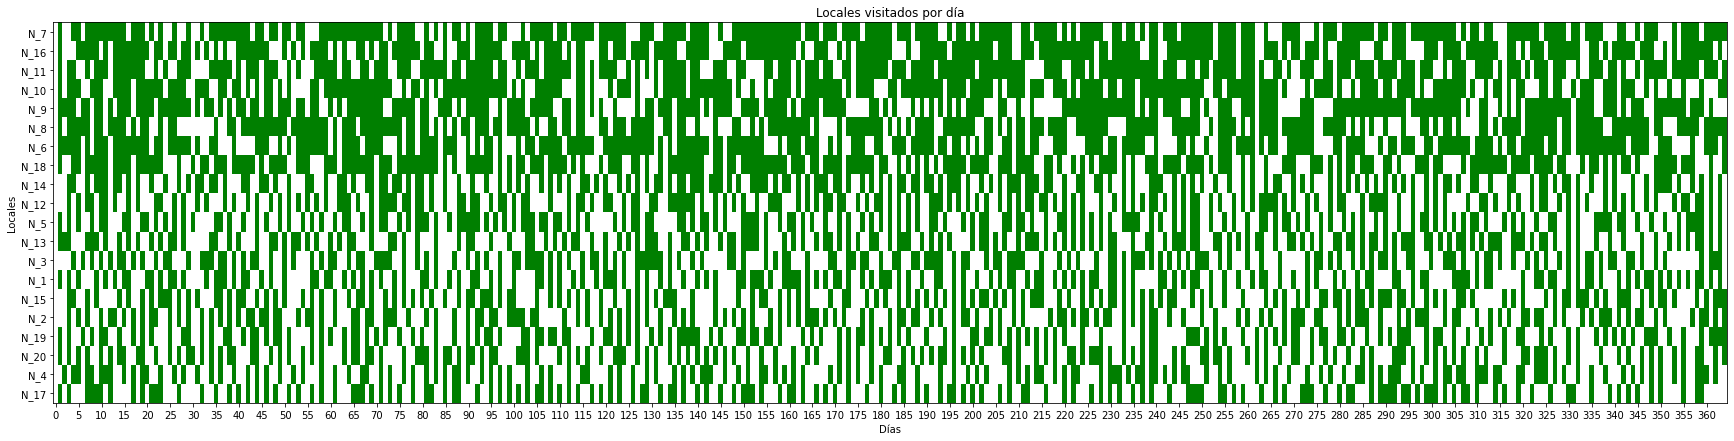

Listo n20full.xlsx con demanda c


Inicial LS: [], costo SO = 5428654.223965126
Final LS: {0: []}, costo SO = 5428654.223965126
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_16', 'N_7', 'N_0'], costo SO = 9199139.546636997
Final LS: [['N_0', 'N_16', 'N_15', 'N_12', 'N_2', 'N_8', 'N_13', 'N_7']], costo SO = 6831850.783001925
Tiempo: 1 | Ruta: ['N_0', 'N_16', 'N_15', 'N_12', 'N_2', 'N_8', 'N_13', 'N_7', 'N_0'] | costo_SO: 379.3101322649693 | costo_r: 1913.1511819818284


Inicial LS: ['N_0', 'N_3', 'N_6', 'N_9', 'N_11', 'N_8', 'N_20', 'N_17', 'N_18', 'N_1', 'N_5', 'N_10', 'N_7', 'N_0'], costo SO = 5538997.961753077
Final LS: {0: ['N_0', 'N_10', 'N_8', 'N_3', 'N_8', 'N_7', 'N_3', 'N_17', 'N_1', 'N_6', 'N_10', 'N_8', 'N_5', 'N_0']}, costo SO = 5538997.961753077
Tiempo: 2 | Ruta: ['N_0', 'N_10', 'N_8', 'N_3', 'N_7', 'N_17', 'N_1', 'N_6', 'N_5', 'N_0'] | costo_SO: 346.92968674118634 | costo_r: 1840.9741387360225


Inicial LS: ['N_0', 'N_

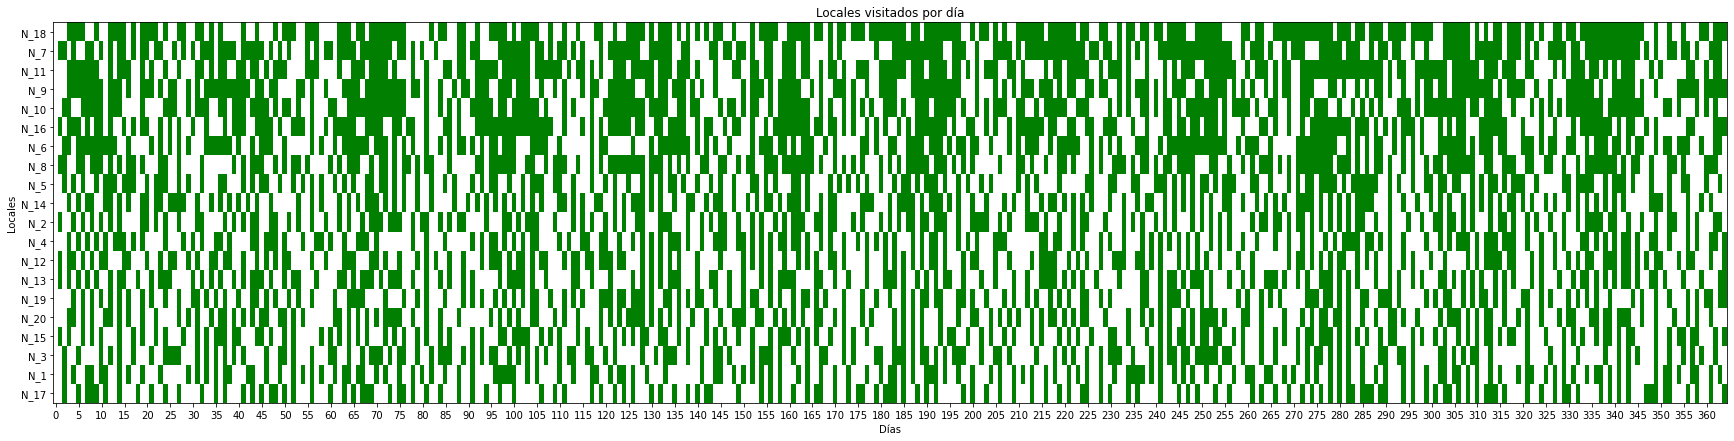

Listo n20full.xlsx con demanda o


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_24', 'N_13', 'N_24', 'N_21', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_26', 'N_17', 'N_18', 'N_4', 'N_14', 'N_8', 'N_23', 'N_2', 'N_21', 'N_29', 'N_20', 'N_6', 'N_27', 'N_5', 'N_26', 'N_10', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_13', 'N_21', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_26', 'N_17', 'N_18', 'N_4', 'N_14', 'N_8', 'N_23', 'N_2', 'N_29', 'N_20', 'N_6', 'N_27', 'N_5', 'N_10', 'N_0'] | costo_SO: 377.45626806048574 | costo_r: 4013.5613780426092


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_7', 'N_10', 'N_1', 'N_12', 'N_19', 'N_25', 'N_16', 'N_8', 'N_9', 'N_22', 'N_0'], costo SO = 8161873.701257329
Final LS: [['N_0', 'N_3', 'N

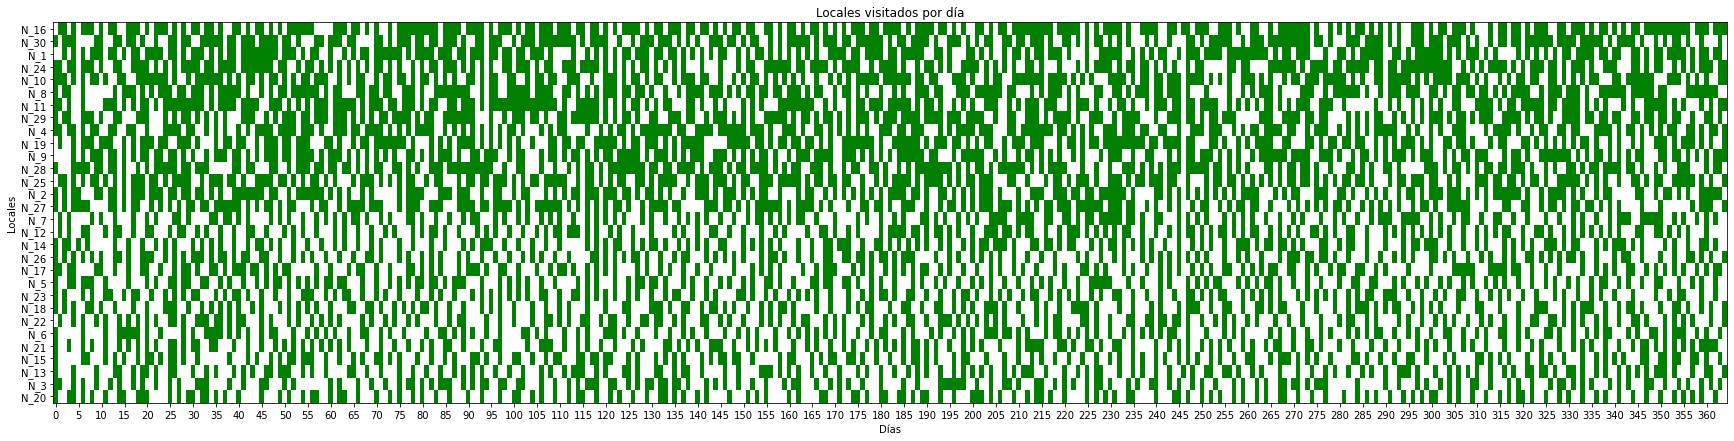

Listo n30empty.xlsx con demanda n


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_11', 'N_13', 'N_8', 'N_11', 'N_27', 'N_28', 'N_30', 'N_6', 'N_19', 'N_25', 'N_4', 'N_10', 'N_26', 'N_14', 'N_26', 'N_24', 'N_9', 'N_2', 'N_21', 'N_13', 'N_22', 'N_16', 'N_20', 'N_12', 'N_5', 'N_1', 'N_12', 'N_17', 'N_23', 'N_7', 'N_18', 'N_29', 'N_29', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_11', 'N_13', 'N_8', 'N_27', 'N_28', 'N_30', 'N_6', 'N_19', 'N_25', 'N_4', 'N_10', 'N_26', 'N_14', 'N_24', 'N_9', 'N_2', 'N_21', 'N_22', 'N_16', 'N_20', 'N_12', 'N_5', 'N_1', 'N_17', 'N_23', 'N_7', 'N_18', 'N_29', 'N_0'] | costo_SO: 93.79267262686214 | costo_r: 5742.208969681479


Inicial LS: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_25', 'N_

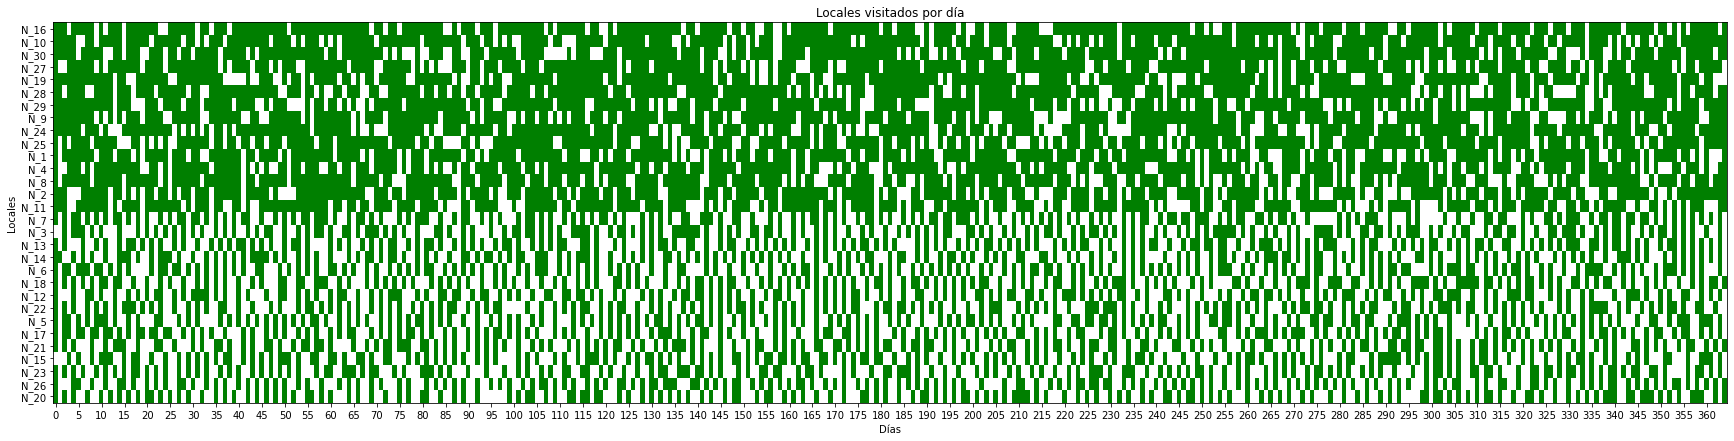

Listo n30empty.xlsx con demanda c


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_6', 'N_25', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_18', 'N_27', 'N_12', 'N_5', 'N_1', 'N_26', 'N_10', 'N_7', 'N_23', 'N_16', 'N_0'], costo SO = 0.0
Final LS: {0: ['N_0', 'N_3', 'N_11', 'N_5', 'N_28', 'N_25', 'N_15', 'N_12', 'N_6', 'N_27', 'N_25', 'N_14', 'N_8', 'N_9', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_27', 'N_30', 'N_17', 'N_20', 'N_26', 'N_2', 'N_13', 'N_9', 'N_1', 'N_16', 'N_0']}, costo SO = 0.0
Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_11', 'N_5', 'N_28', 'N_25', 'N_15', 'N_12', 'N_6', 'N_27', 'N_14', 'N_8', 'N_9', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_30', 'N_17', 'N_20', 'N_26', 'N_2', 'N_1', 'N_16', 'N_0'] | costo_SO: 338.333959834976 | costo_r: 3541.7293572548665


Inicial LS: ['N_0', 'N_24', 'N_28', 'N_7', 'N_10', 'N_23', 'N_25', 'N_19', 'N_27', 'N_18', 'N_2', 'N_29', 'N_0'], costo SO = 10944930.007480353
Final L

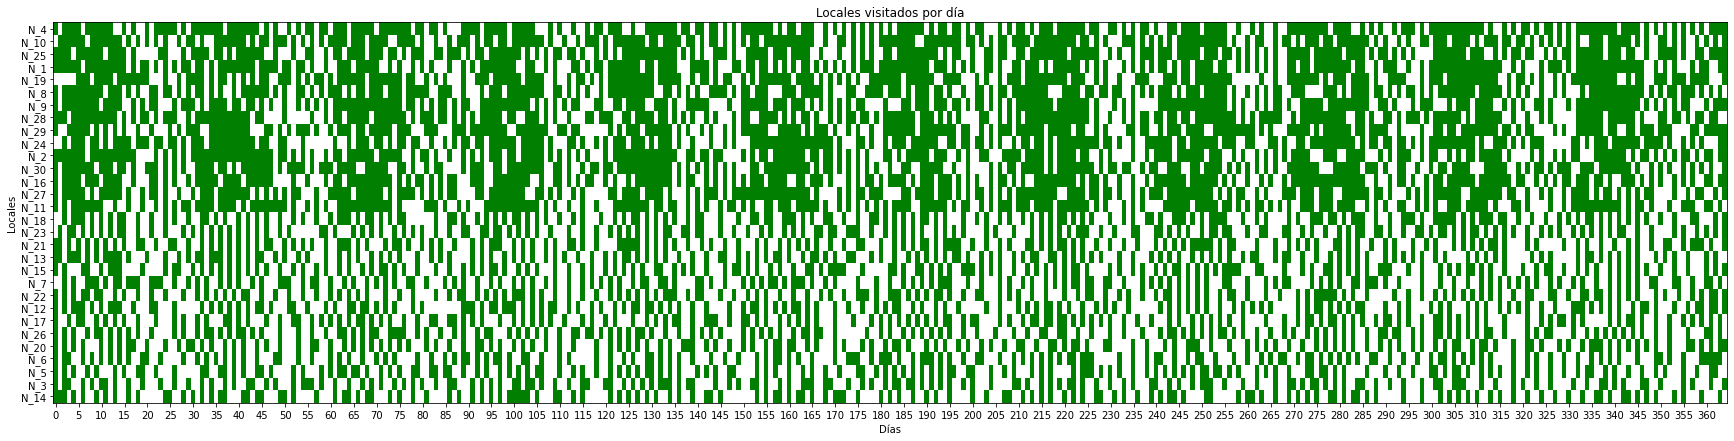

Listo n30empty.xlsx con demanda o


Inicial LS: ['N_0', 'N_11', 'N_25', 'N_16', 'N_0'], costo SO = 9696743.544635281
Final LS: [['N_0', 'N_30', 'N_21', 'N_6', 'N_20', 'N_28', 'N_25', 'N_11']], costo SO = 6802975.4387016995
Tiempo: 0 | Ruta: ['N_0', 'N_30', 'N_21', 'N_6', 'N_20', 'N_28', 'N_25', 'N_11', 'N_0'] | costo_SO: 358.1521918922162 | costo_r: 1398.121295213539


Inicial LS: ['N_0', 'N_24', 'N_1', 'N_10', 'N_15', 'N_27', 'N_19', 'N_25', 'N_16', 'N_8', 'N_9', 'N_2', 'N_29', 'N_4', 'N_13', 'N_0'], costo SO = 8494858.581787102
Final LS: [['N_0', 'N_18', 'N_27', 'N_22', 'N_5', 'N_12', 'N_9', 'N_1', 'N_25', 'N_13', 'N_10', 'N_8', 'N_20', 'N_19', 'N_29', 'N_16', 'N_4']], costo SO = 6578158.169280402
Tiempo: 1 | Ruta: ['N_0', 'N_18', 'N_27', 'N_22', 'N_5', 'N_12', 'N_9', 'N_1', 'N_25', 'N_13', 'N_10', 'N_8', 'N_20', 'N_19', 'N_29', 'N_16', 'N_4', 'N_0'] | costo_SO: 204.77200474381095 | costo_r: 4815.297537706789


Inicial LS: ['N_0', 'N_24', 'N_3', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17'

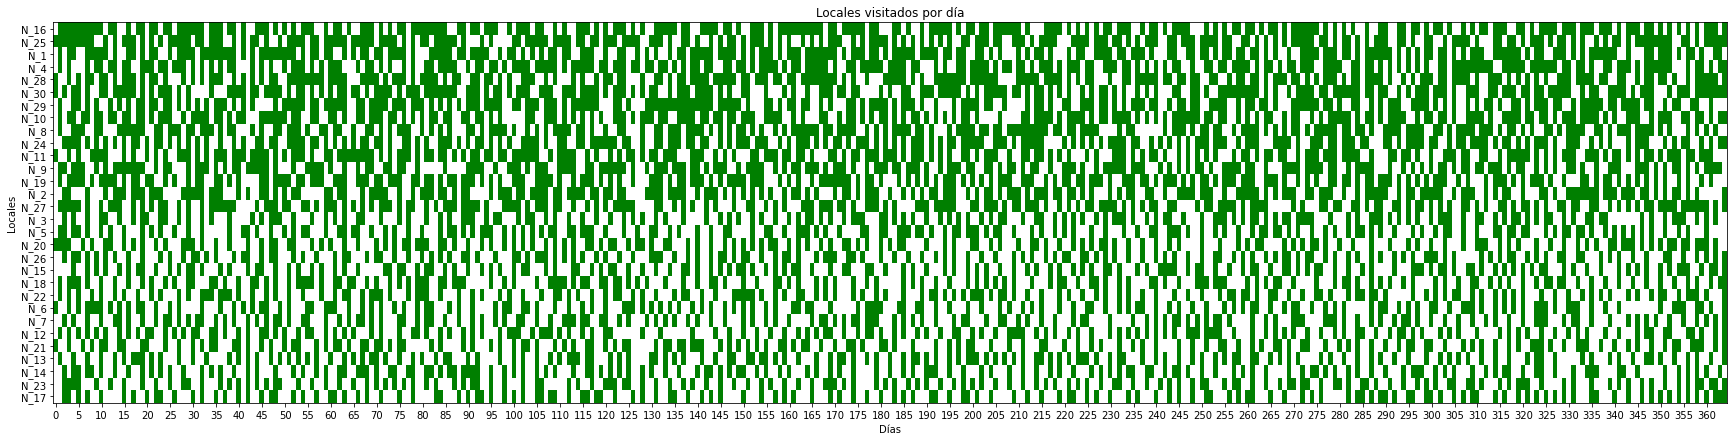

Listo n30estandar.xlsx con demanda n


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_30', 'N_27', 'N_19', 'N_25', 'N_16', 'N_8', 'N_9', 'N_2', 'N_29', 'N_4', 'N_1', 'N_10', 'N_0'], costo SO = 5191754.579389591
Final LS: [['N_0', 'N_3', 'N_19', 'N_30', 'N_14', 'N_2', 'N_15', 'N_16', 'N_24', 'N_8', 'N_9', 'N_10', 'N_28', 'N_1']], costo SO = 4409837.531665438
Tiempo: 0 | Ruta: ['N_0', 'N_3', 'N_19', 'N_30', 'N_14', 'N_2', 'N_15', 'N_16', 'N_24', 'N_8', 'N_9', 'N_10', 'N_28', 'N_1', 'N_0'] | costo_SO: 95.96274517832798 | costo_r: 2997.86298099529


Inicial LS: ['N_0', 'N_24', 'N_11', 'N_28', 'N_7', 'N_17', 'N_6', 'N_25', 'N_19', 'N_27', 'N_12', 'N_5', 'N_18', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_9', 'N_8', 'N_16', 'N_23', 'N_1', 'N_26', 'N_0'], costo SO = 2928306.6918576243
Final LS: [['N_0', 'N_11', 'N_28', 'N_18', 'N_17', 'N_24', 'N_25', 'N_9', 'N_10', 'N_19', 'N_27', 'N_12', 'N_2', 'N_7', 'N_29', 'N_4', 'N_19', 'N_23', 'N_13', 'N_1', 'N_26']], costo SO = 2485741.8159047132


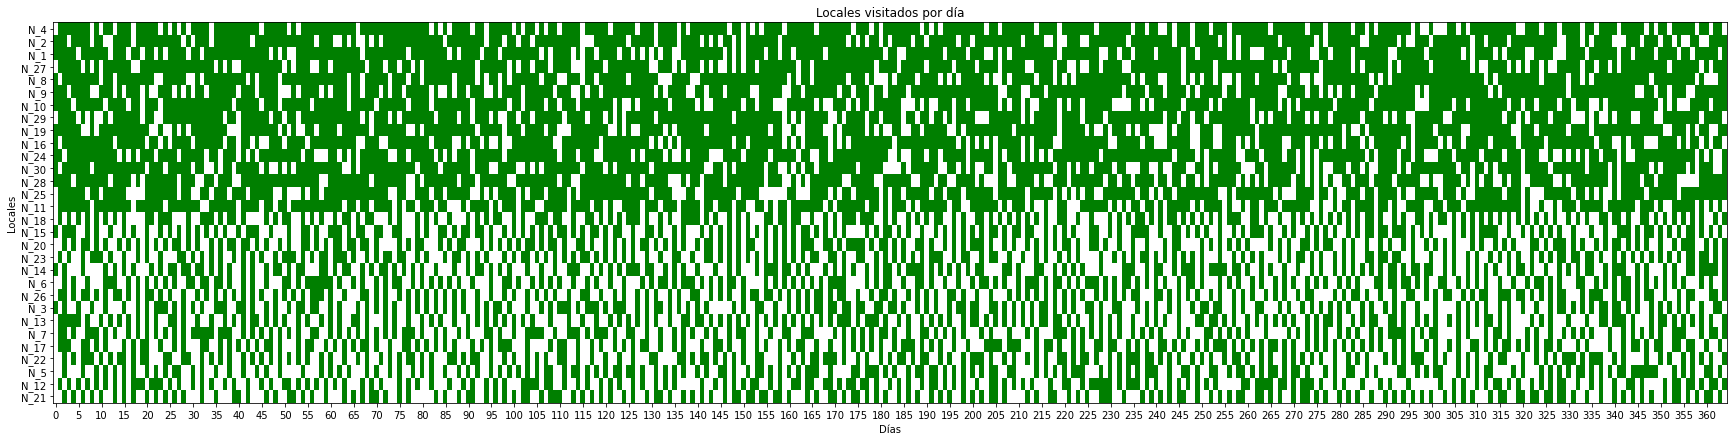

Listo n30estandar.xlsx con demanda c


Inicial LS: [], costo SO = 17469756.128845602
Final LS: {0: []}, costo SO = 17469756.128845602
Tiempo: 0 | Ruta: [] | costo_SO: 392.20716873854735 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_17', 'N_7', 'N_10', 'N_1', 'N_27', 'N_18', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_29', 'N_4', 'N_13', 'N_0'], costo SO = 4071940.3050221517
Final LS: [['N_0', 'N_24', 'N_14', 'N_29', 'N_5', 'N_1', 'N_29', 'N_11', 'N_2', 'N_30', 'N_25', 'N_1', 'N_8', 'N_6', 'N_17', 'N_12', 'N_9', 'N_27', 'N_28', 'N_19', 'N_21', 'N_4', 'N_13']], costo SO = 2138678.4307302698
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_14', 'N_29', 'N_5', 'N_1', 'N_11', 'N_2', 'N_30', 'N_25', 'N_8', 'N_6', 'N_17', 'N_12', 'N_9', 'N_27', 'N_28', 'N_19', 'N_21', 'N_4', 'N_13', 'N_0'] | costo_SO: 431.29562495139095 | costo_r: 3556.980508497849


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_30', 'N_15', 'N_27', 'N_18', 'N_2', 'N_29', 'N_22',

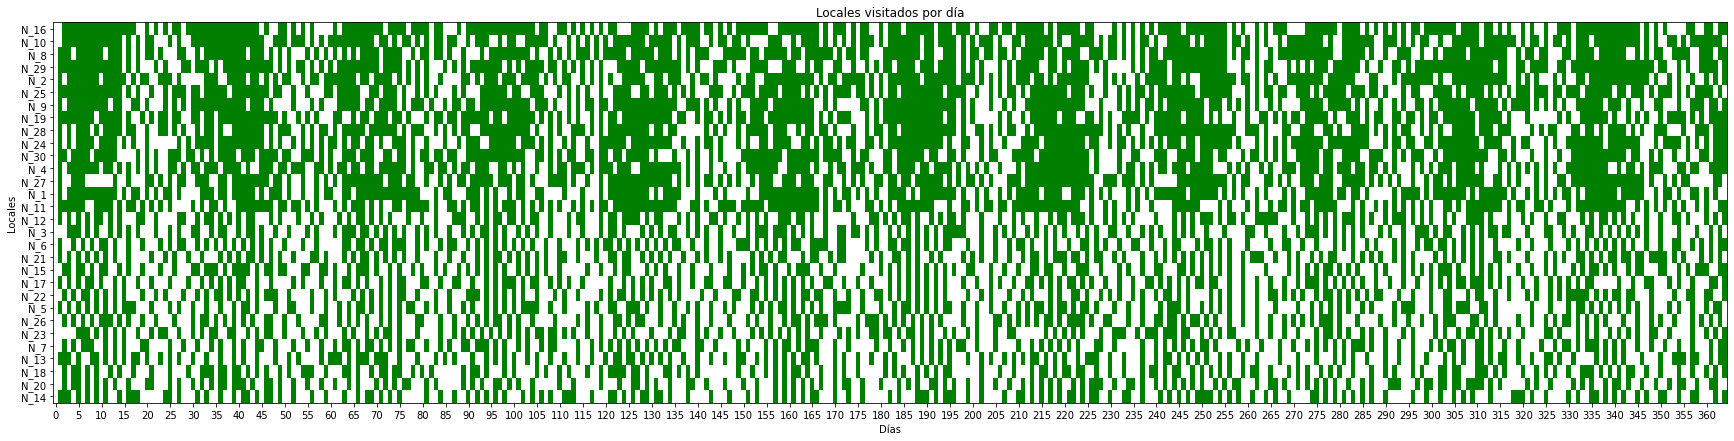

Listo n30estandar.xlsx con demanda o


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 6057388.937977668
Final LS: {0: []}, costo SO = 6057388.937977668
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_11', 'N_20', 'N_26', 'N_10', 'N_7', 'N_17', 'N_6', 'N_5', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_0'], costo SO = 6381022.0655597495
Final LS: [['N_0', 'N_11', 'N_8', 'N_24', 'N_18', 'N_4', 'N_26', 'N_20', 'N_30', 'N_13', 'N_21', 'N_9', 'N_27', 'N_22', 'N_10']], costo SO = 4270829.087228776
Tiempo: 2 | Ruta: ['N_0', 'N_11', 'N_8', 'N_24', 'N_18', 'N_4', 'N_26', 'N_20', 'N_30', 'N_13', 'N_21', 'N_9', 'N_27', 'N_22', 'N_10', 'N_0'] | costo_SO: 421.5764527243107 | costo_r: 3295.074314859686


Inicial LS: ['N_0', 'N_3', 'N_28', 'N_7', 'N_17', 'N_15', 'N_6', 'N_25', 'N_19', 'N_14', 'N_16', 'N_23', 'N_12', 'N_5', 'N_2', 'N_29', 'N_1', 'N_0'], costo SO = 2943061.43030219

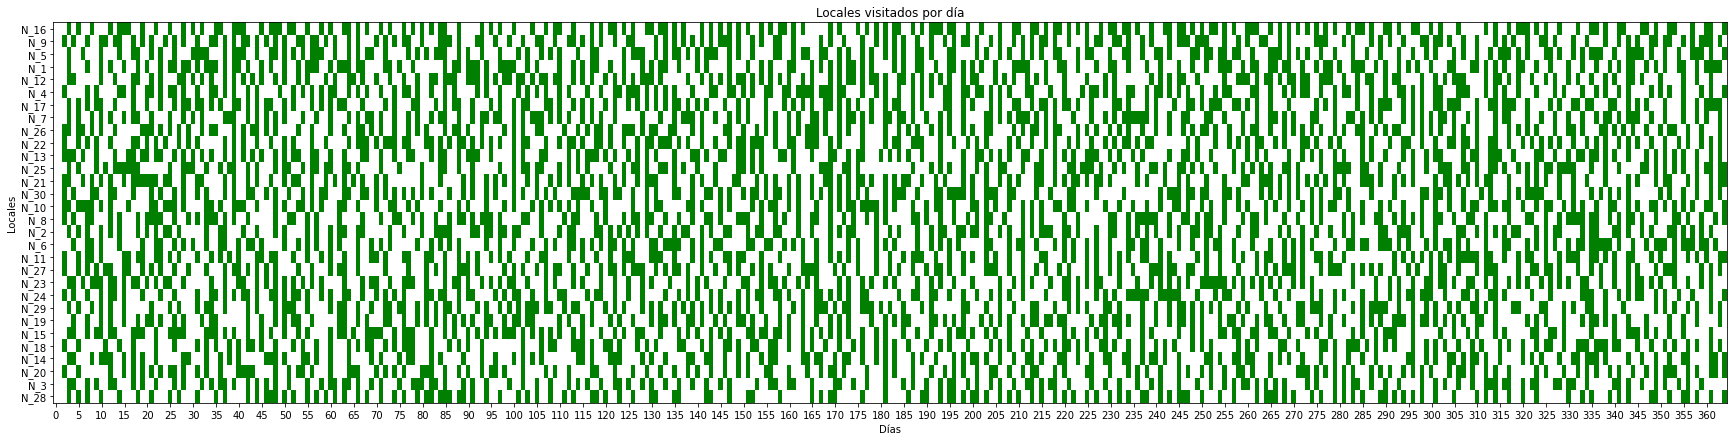

Listo n30full.xlsx con demanda n


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 5359174.565683502
Final LS: {0: []}, costo SO = 5359174.565683502
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_11', 'N_28', 'N_30', 'N_15', 'N_17', 'N_12', 'N_27', 'N_5', 'N_18', 'N_21', 'N_29', 'N_4', 'N_13', 'N_22', 'N_9', 'N_8', 'N_19', 'N_25', 'N_23', 'N_7', 'N_10', 'N_3', 'N_1', 'N_0'], costo SO = 2265486.6600332507
Final LS: [['N_0', 'N_19', 'N_11', 'N_21', 'N_30', 'N_4', 'N_17', 'N_9', 'N_8', 'N_29', 'N_15', 'N_23', 'N_3', 'N_10', 'N_24', 'N_27', 'N_19', 'N_18', 'N_7', 'N_14', 'N_2', 'N_28', 'N_1']], costo SO = 1274760.1301780106
Tiempo: 2 | Ruta: ['N_0', 'N_19', 'N_11', 'N_21', 'N_30', 'N_4', 'N_17', 'N_9', 'N_8', 'N_29', 'N_15', 'N_23', 'N_3', 'N_10', 'N_24', 'N_27', 'N_18', 'N_7', 'N_14', 'N_2', 'N_28', 'N_1', 'N_0'] | costo_SO: 159.48598144971305 | costo_r: 4734.86133122041

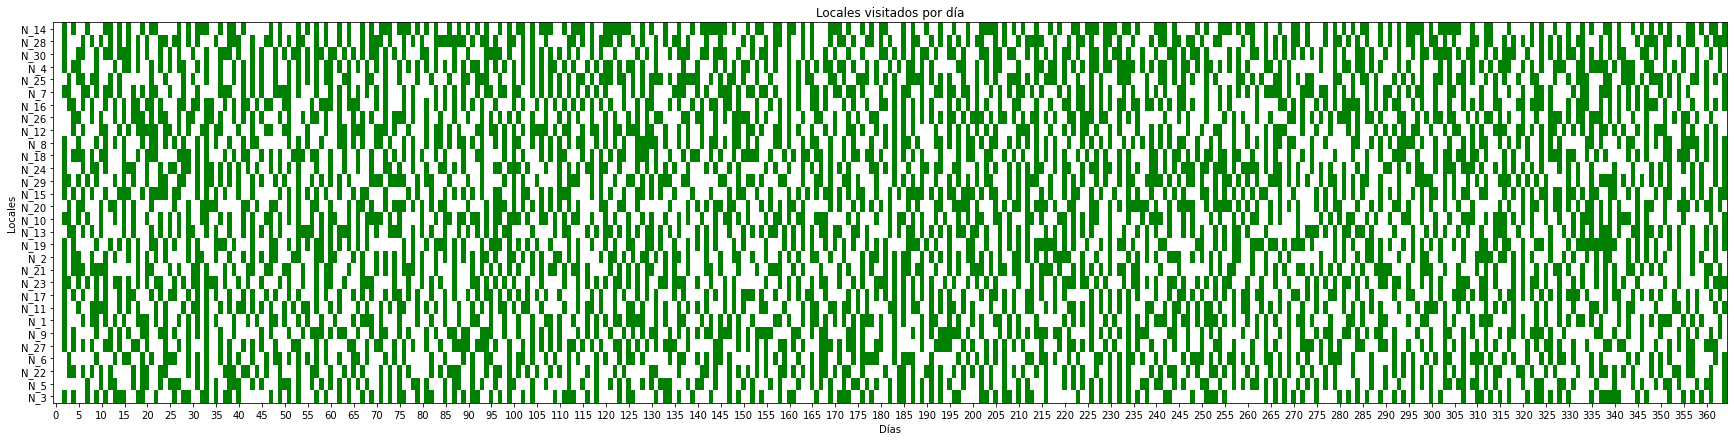

Listo n30full.xlsx con demanda c


Inicial LS: [], costo SO = 0.0
Final LS: {0: []}, costo SO = 0.0
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: [], costo SO = 14326485.177790197
Final LS: {0: []}, costo SO = 14326485.177790197
Tiempo: 1 | Ruta: [] | costo_SO: 0 | costo_r: 0


Inicial LS: ['N_0', 'N_24', 'N_20', 'N_3', 'N_11', 'N_30', 'N_6', 'N_19', 'N_14', 'N_8', 'N_9', 'N_2', 'N_21', 'N_22', 'N_4', 'N_18', 'N_27', 'N_5', 'N_1', 'N_26', 'N_10', 'N_16', 'N_0'], costo SO = 5218540.152769009
Final LS: [['N_0', 'N_24', 'N_20', 'N_27', 'N_3', 'N_11', 'N_9', 'N_6', 'N_4', 'N_12', 'N_21', 'N_10', 'N_14', 'N_18', 'N_26', 'N_8', 'N_1', 'N_5', 'N_19', 'N_30', 'N_1', 'N_2', 'N_29', 'N_16']], costo SO = 2546445.3814479164
Tiempo: 2 | Ruta: ['N_0', 'N_24', 'N_20', 'N_27', 'N_3', 'N_11', 'N_9', 'N_6', 'N_4', 'N_12', 'N_21', 'N_10', 'N_14', 'N_18', 'N_26', 'N_8', 'N_1', 'N_5', 'N_19', 'N_30', 'N_2', 'N_29', 'N_16', 'N_0'] | costo_SO: 201.40877461726453 | costo_r: 5254.998115587305



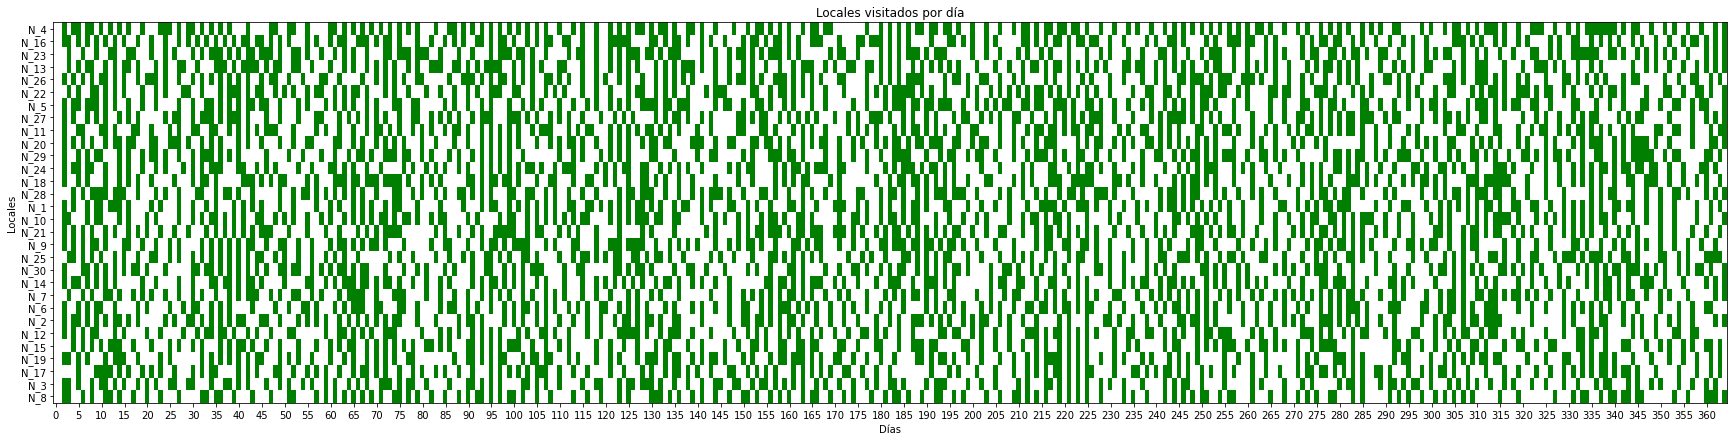

Listo n30full.xlsx con demanda o


In [ ]:
#n_s = [10,20,30]
#inicial = ['empty', 'estandar', 'full']
#demandas = ['n', 'c', 'o']
datos_P_sim = {}
df_costos_P = pd.DataFrame()
for n in n_s:
    for i in inicial:
        for dem in demandas:
            file_name = f'n{n}{i}.xlsx'
            output = f'plots//tablero_P_n{n}_{i}_{dem}.png'
            G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
            historia = simular_demanda_previa(G, dist = dem, T=1000, d=30)
            #rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R_modificada(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
            rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS_modificada(grafo_inicial = G, dem_historico = historia, cap = cap_tpte,
                                                                            tipo_demanda = dem, T = 365, d=30)
            datos_P_sim[f'n{n}_{i}_{dem}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P,
                                            'costos': costos_P, 'demanda': dems_P}
            
            costos_consolidados = calcular_costo_consolidado(costos_P, inventarios_P)
            df_costos_P = pd.concat([df_costos_P, pd.DataFrame(costos_consolidados, index = [f'n{n}_{i}_{dem}'])])
            N = len(G.nodes())-1
            df = generar_df(rutas_P, N)
            plotear_tablero_visitas(df, guardar = True, nombre = output)
            print (f'Listo {file_name} con demanda {dem}')

df_costos_P.to_csv('costos_P.csv')
json.dump(datos_P_sim, open('datos_P_sim.json', 'w'))